In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
delivery_df = pd.read_csv('/content/drive/MyDrive/task2 (1)/df_cleaned-DL.csv')
pickup_df = pd.read_csv('/content/drive/MyDrive/task2 (1)/merged_df_cleaned.csv')
print(delivery_df.head())
print(pickup_df.head())


   order_id  region_id      city  courier_id        lng       lat  aoi_id  \
0   3158819          1  Shanghai         164  121.52128  31.06614     450   
1    751342          1  Shanghai         164  121.52124  31.06687     450   
2   3380476          1  Shanghai         164  121.52106  31.06731     450   
3   2184571          1  Shanghai         164  121.52128  31.06616     450   
4    941371          1  Shanghai         164  121.52123  31.06614     450   

   aoi_type          accept_time      accept_gps_time  ...  \
0         1  2023-06-04 11:05:00  2023-06-04 11:05:00  ...   
1         1  2023-06-04 11:18:00  2023-06-04 11:18:00  ...   
2         1  2023-06-03 10:13:00  2023-06-03 10:13:00  ...   
3         1  2023-06-04 10:39:00  2023-06-04 10:39:00  ...   
4         1  2023-06-04 11:18:00  2023-06-04 11:18:00  ...   

         delivery_time    delivery_gps_time delivery_gps_lng delivery_gps_lat  \
0  2023-06-04 17:40:00  2023-06-04 17:40:00        121.52407         31.06614   
1 

#Univariate Data Analysis:

In [3]:
print(delivery_df.isnull().sum())  # Check for missing values in Delivery dataset
print(pickup_df.isnull().sum())  # Check for missing values in Pickup dataset



order_id                 0
region_id                0
city                     0
courier_id               0
lng                      0
lat                      0
aoi_id                   0
aoi_type                 0
accept_time              0
accept_gps_time          0
accept_gps_lng           0
accept_gps_lat           0
delivery_time            0
delivery_gps_time        0
delivery_gps_lng         0
delivery_gps_lat         0
ds                       0
delivery_time_minutes    0
accept_hour              0
accept_day               0
accept_month             0
ETA_delivery             0
dtype: int64
order_id                      0
region_id                     0
city                          0
courier_id                    0
accept_time                   0
time_window_start             0
time_window_end               0
lng                           0
lat                           0
aoi_id                        0
aoi_type                      0
pickup_time                   0
pickup_gp

In [5]:
# Impute or drop missing values:
pickup_df = pickup_df.dropna()


Analysis of Categorical Features:

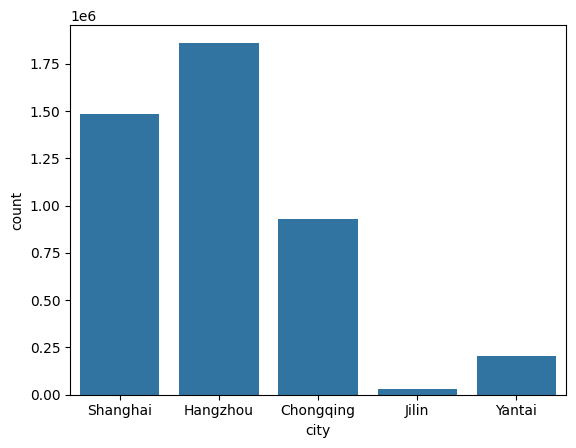

In [7]:
sns.countplot(data=delivery_df, x='city')
plt.show()


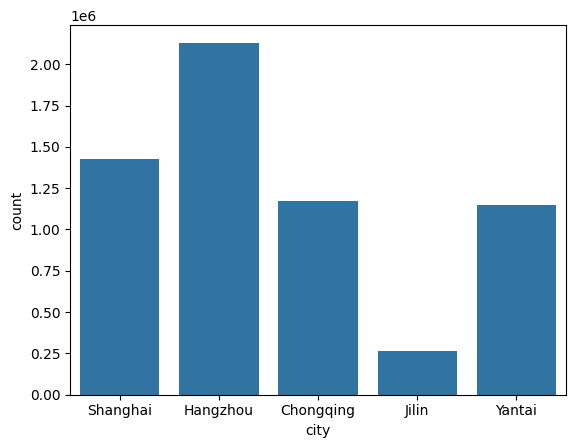

In [9]:
sns.countplot(data=pickup_df, x='city')
plt.show()


**Summary Statistics:**

In [ ]:
print(delivery_df.describe())
print(pickup_df.describe())


           order_id     region_id    courier_id           lng           lat  \
count  4.511284e+06  4.511284e+06  4.511284e+06  4.511284e+06  4.511284e+06   
mean   2.257350e+06  7.377031e+01  2.385267e+03  1.178650e+02  3.084215e+01   
std    1.303266e+06  4.536321e+01  1.390574e+03  5.823104e+00  1.913233e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  1.020849e+02  2.311348e+01   
25%    1.128705e+06  3.600000e+01  1.206000e+03  1.199664e+02  3.012165e+01   
50%    2.257342e+06  7.100000e+01  2.346000e+03  1.202295e+02  3.030641e+01   
75%    3.386020e+06  1.110000e+02  3.588000e+03  1.214099e+02  3.118887e+01   
max    4.514660e+06  1.670000e+02  4.876000e+03  1.268191e+02  4.422335e+01   

             aoi_id      aoi_type  accept_gps_lng  accept_gps_lat  \
count  4.511284e+06  4.511284e+06    4.511284e+06    4.511284e+06   
mean   2.997859e+04  4.352154e+00    1.178629e+02    3.083946e+01   
std    1.729011e+04  5.525617e+00    5.853219e+00    1.916018e+00   
min    0.000

**Visualizing Distributions:**

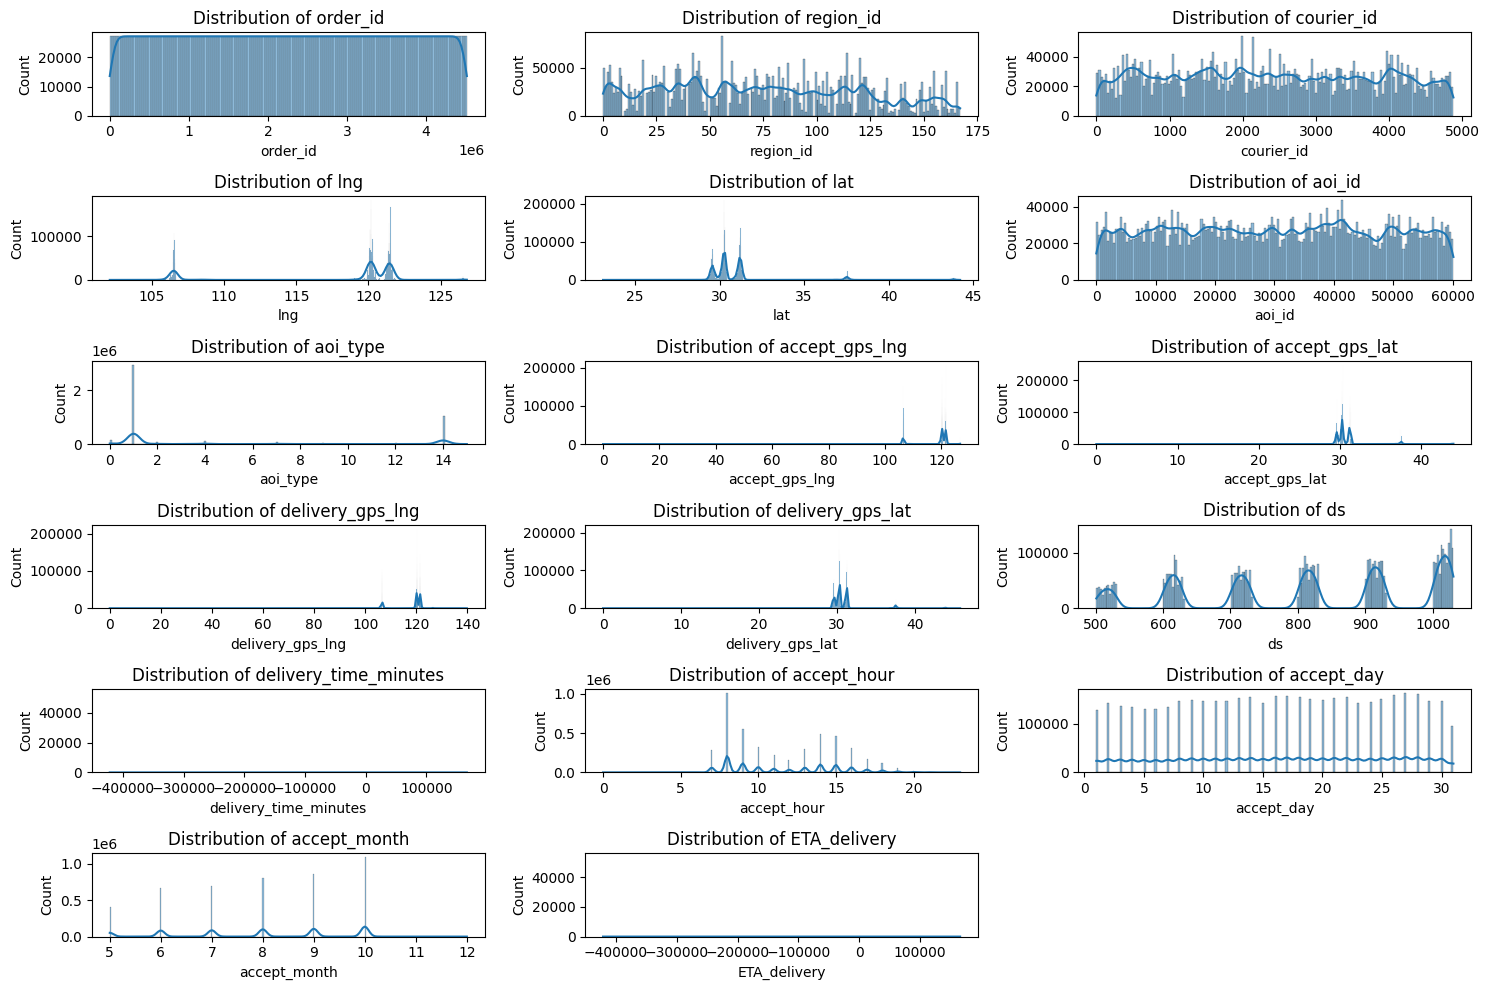

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner uniquement les colonnes numériques
numeric_columns = delivery_df.select_dtypes(include=['float64', 'int64']).columns

# Créer des graphiques pour chaque colonne numérique
plt.figure(figsize=(15, 10))  # Ajustez la taille de la figure selon le nombre de colonnes
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns)//3 + 1, 3, i)  # Disposer les graphiques en sous-grilles
    sns.histplot(delivery_df[col], kde=True)  # Histogramme avec courbe de densité
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()


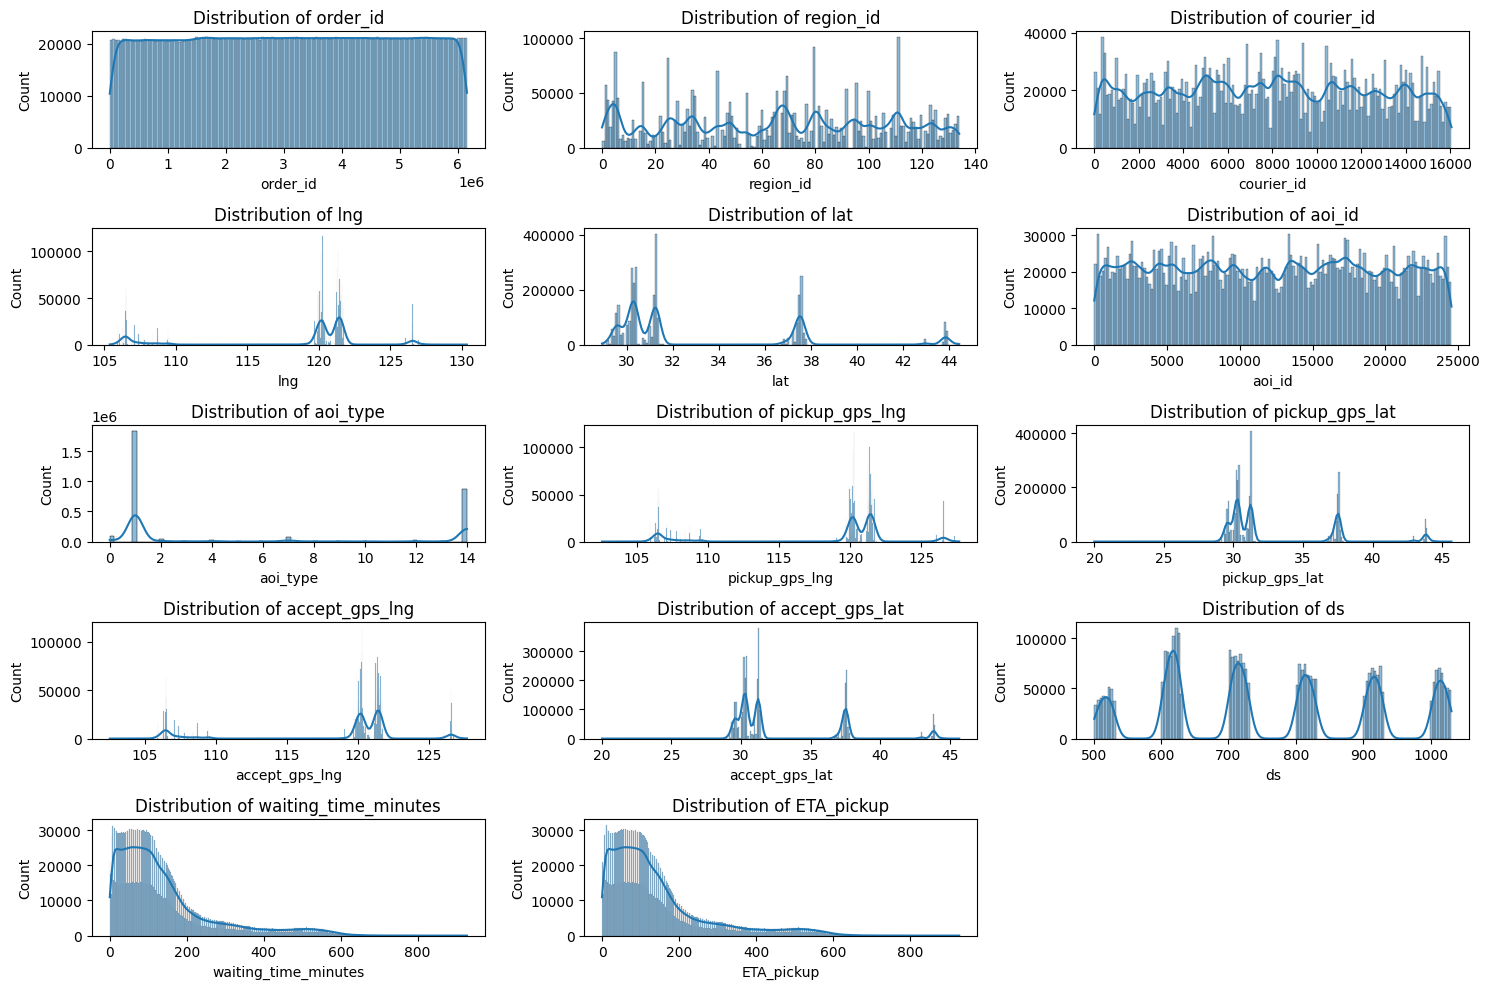

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner uniquement les colonnes numériques
numeric_columns = pickup_df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns)//3 + 1, 3, i)  # Disposer les graphiques en sous-grilles
    sns.histplot(pickup_df[col], kde=True)  # Histogramme avec courbe de densité
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

Outlier Detection:

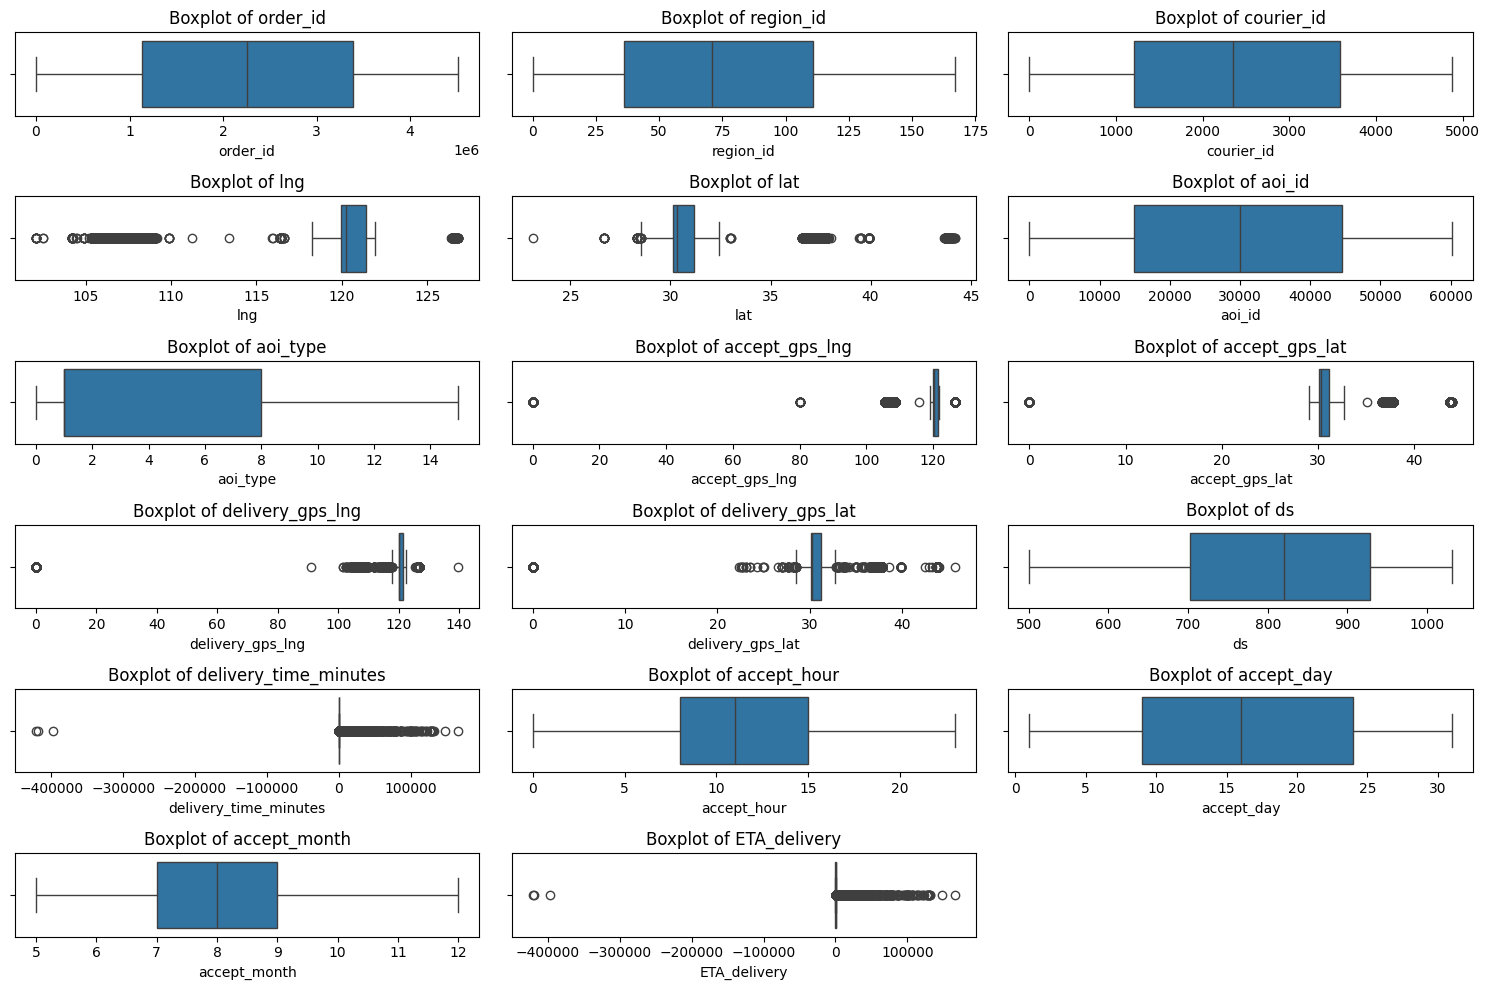

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner uniquement les colonnes numériques
numeric_columns = delivery_df.select_dtypes(include=['float64', 'int64']).columns

# Créer des boxplots pour chaque colonne numérique
plt.figure(figsize=(15, 10))  # Ajustez la taille de la figure selon le nombre de colonnes
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns)//3 + 1, 3, i)  # Disposer les graphiques en sous-grilles
    sns.boxplot(data=delivery_df, x=col)  # Créer un boxplot pour chaque colonne numérique
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()



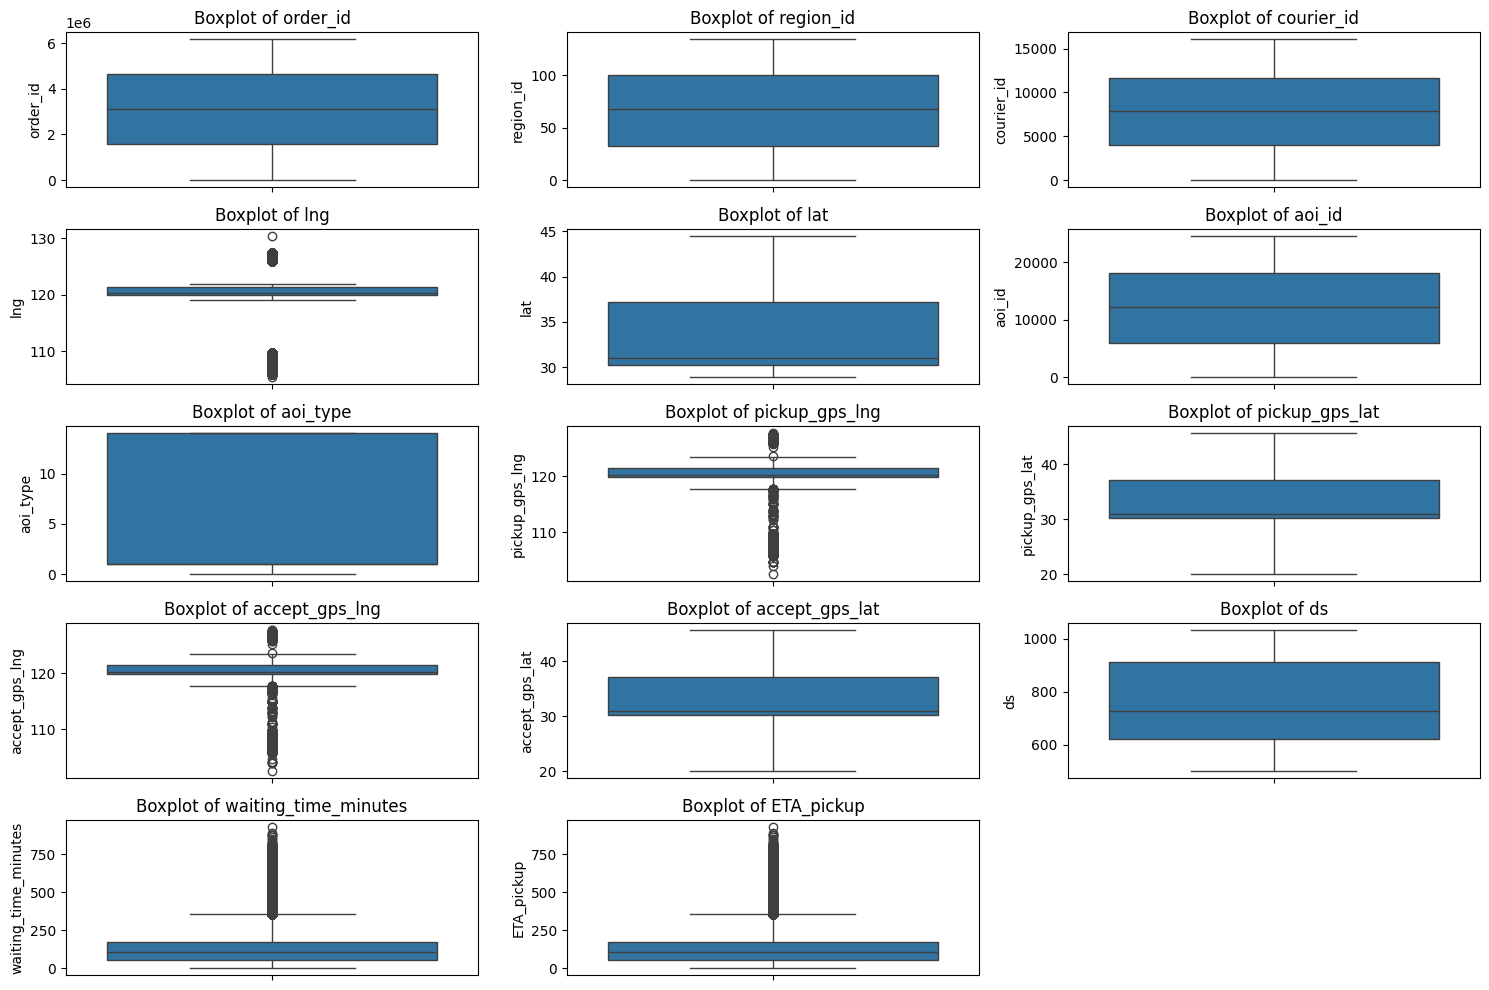

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = pickup_df.select_dtypes(include=['float64', 'int64']).columns

# Créer des boxplots pour chaque colonne numérique
plt.figure(figsize=(15, 10))  # Ajustez la taille de la figure selon le nombre de colonnes
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns)//3 + 1, 3, i)  # Disposer les graphiques en sous-grilles
    sns.boxplot(data=pickup_df, y=col)  # Créer un boxplot pour chaque colonne numérique
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


#Bivariate Data Analysis:

delevery

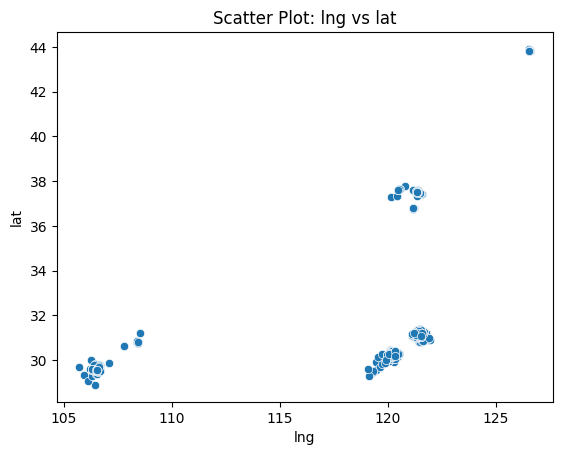

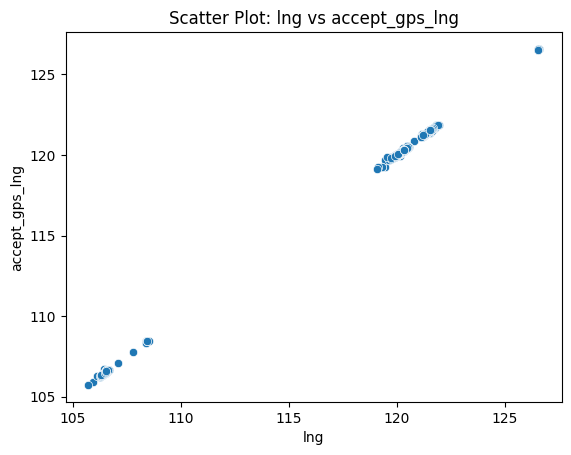

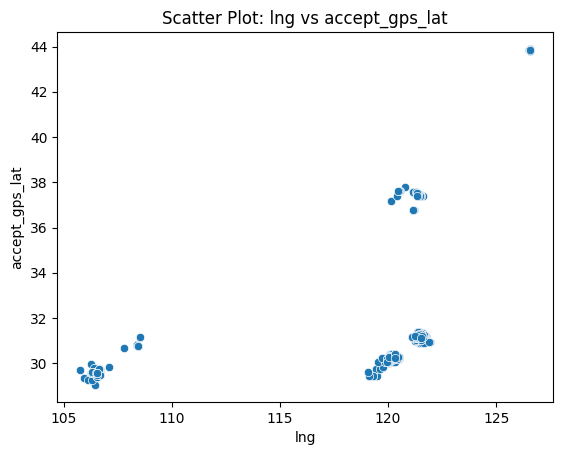

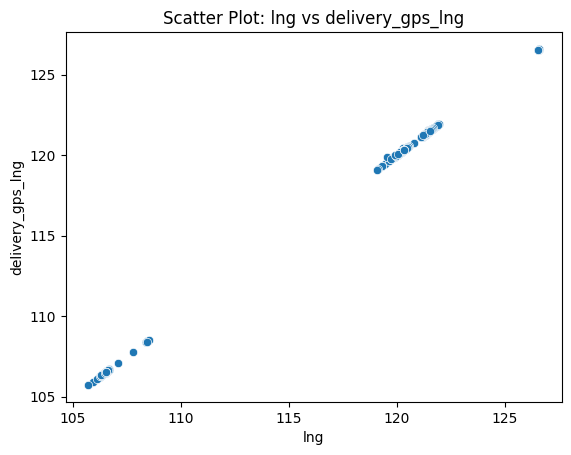

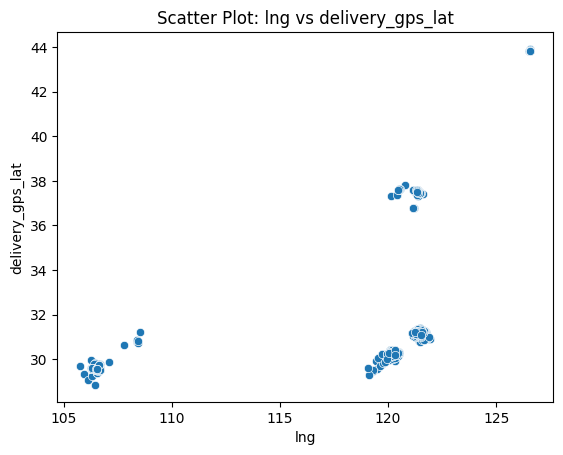

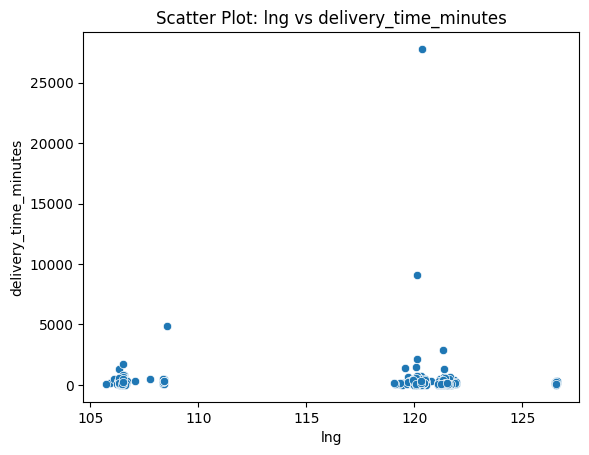

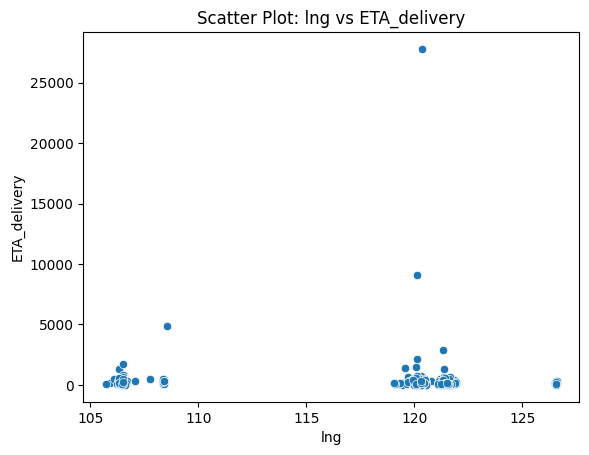

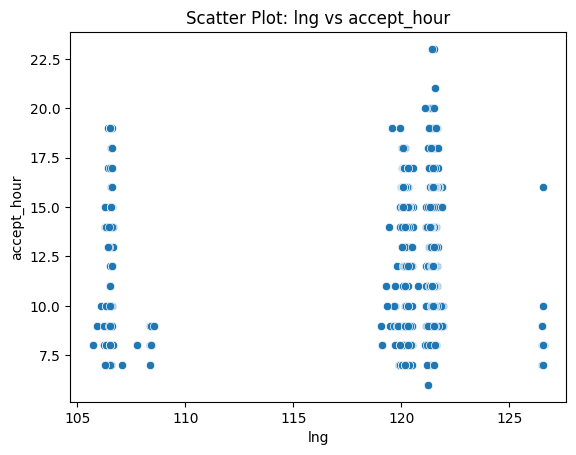

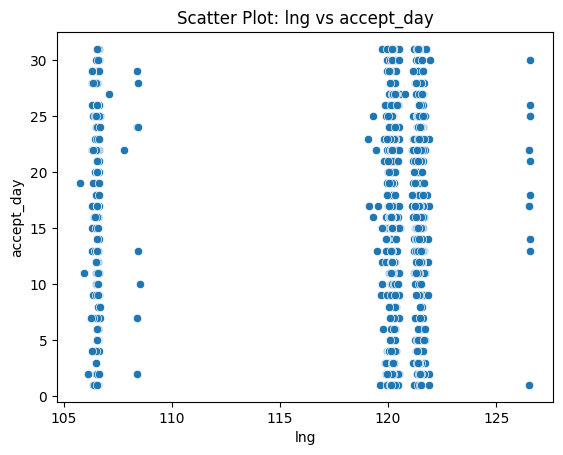

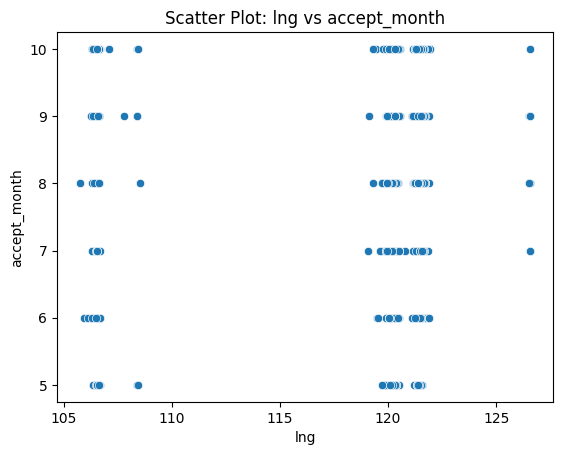

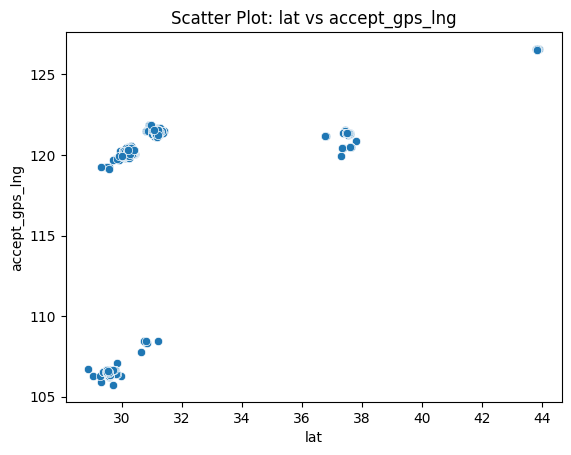

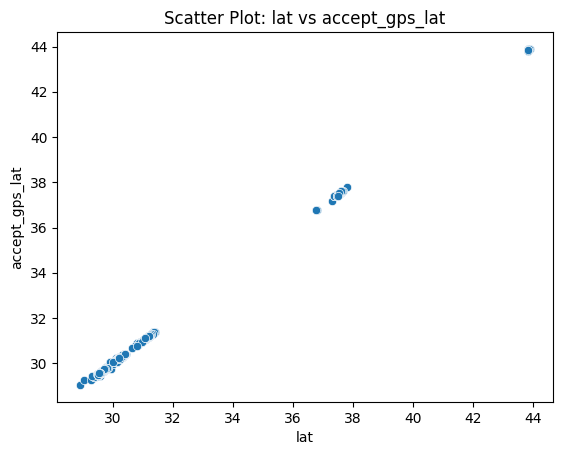

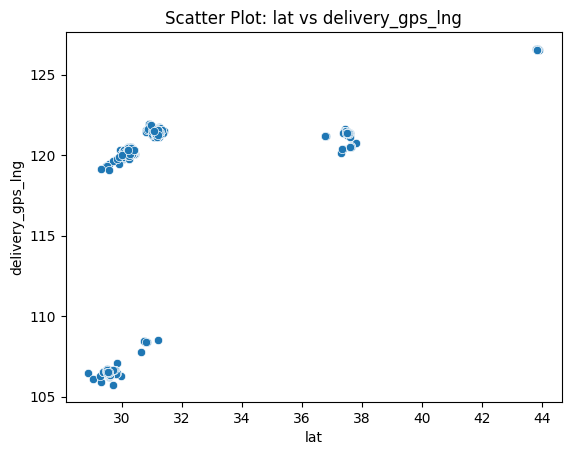

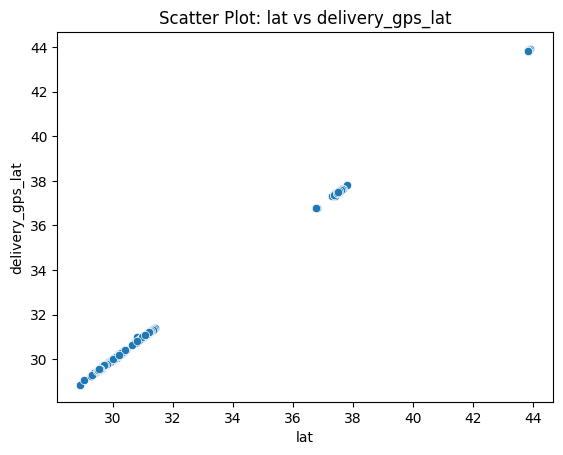

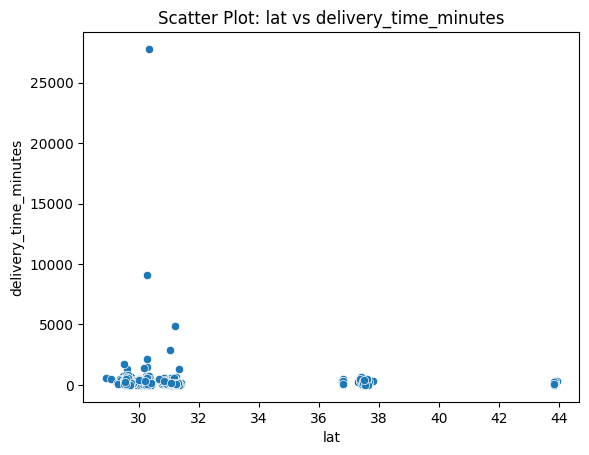

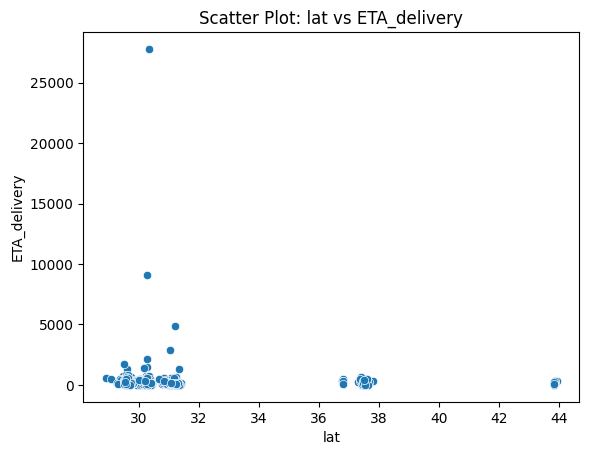

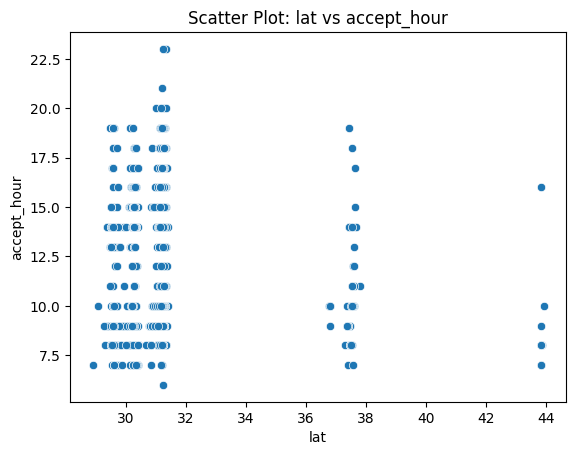

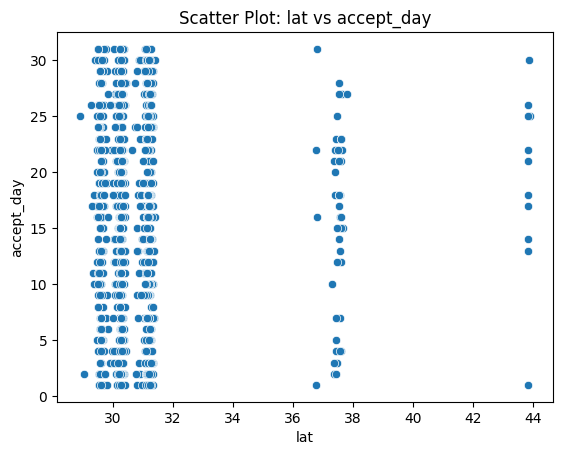

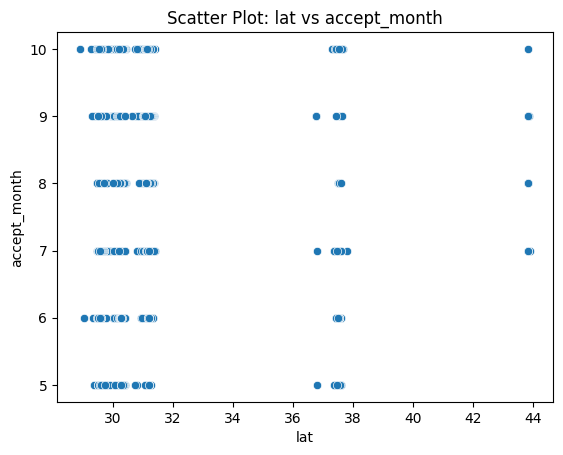

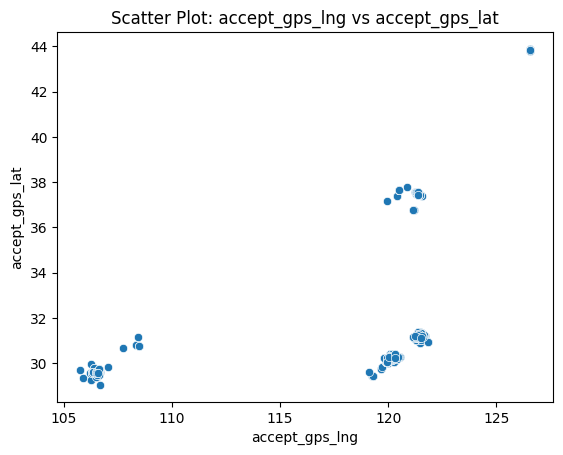

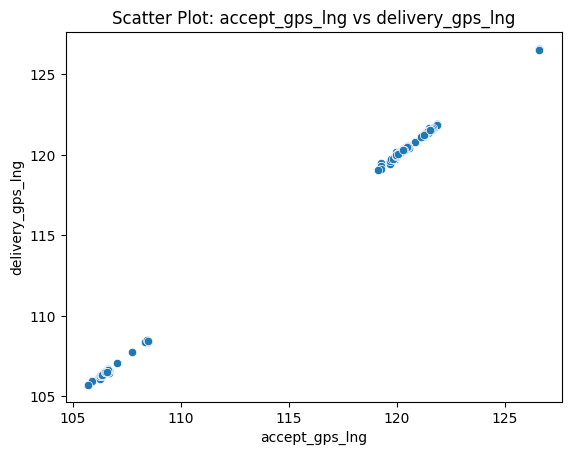

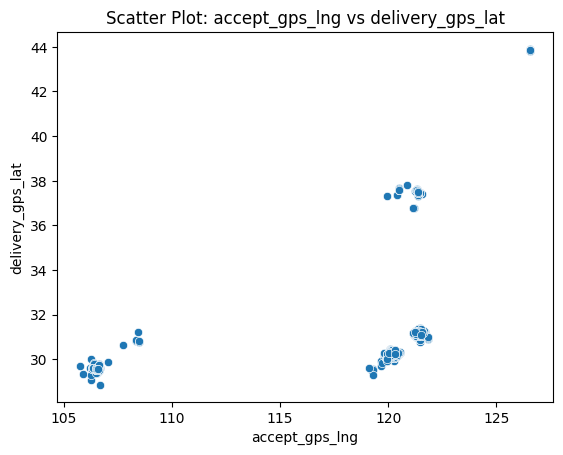

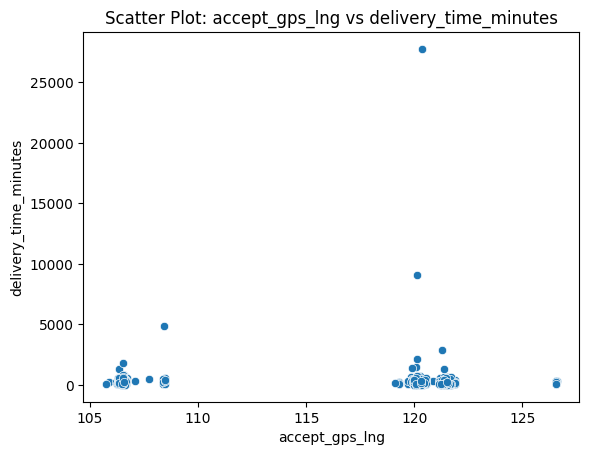

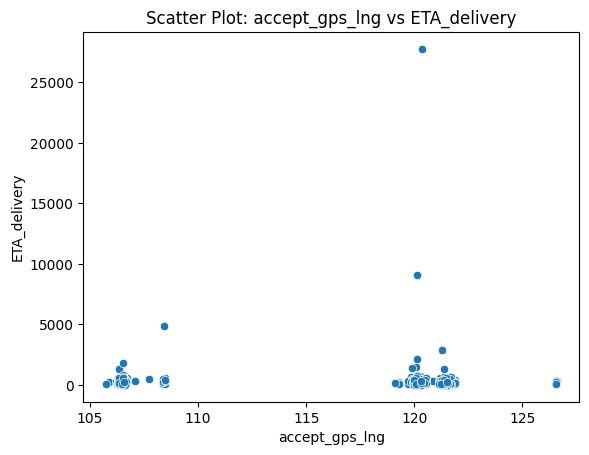

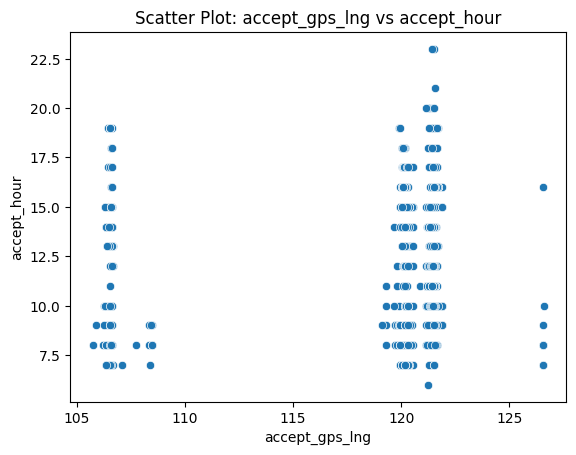

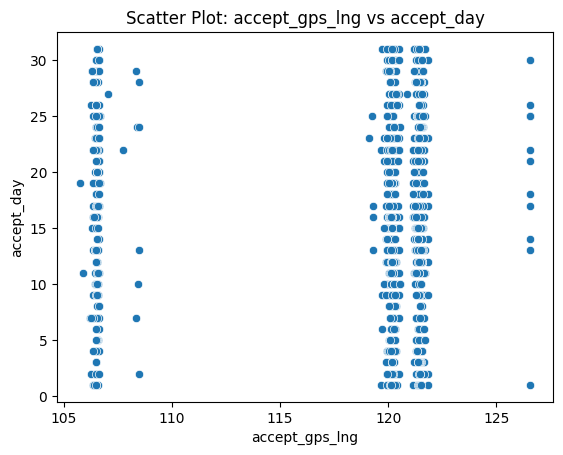

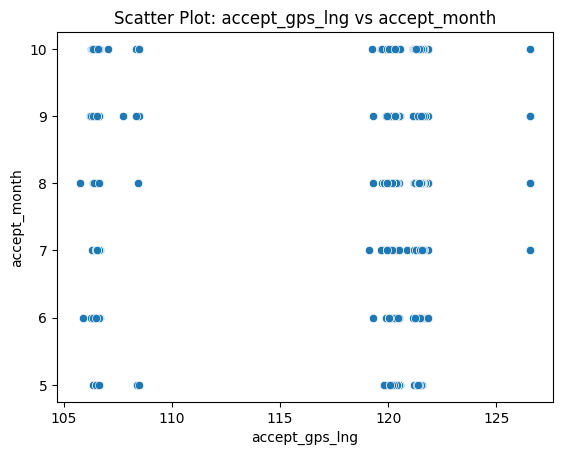

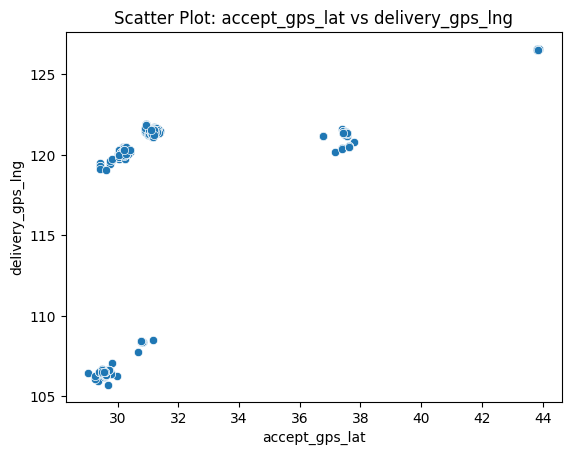

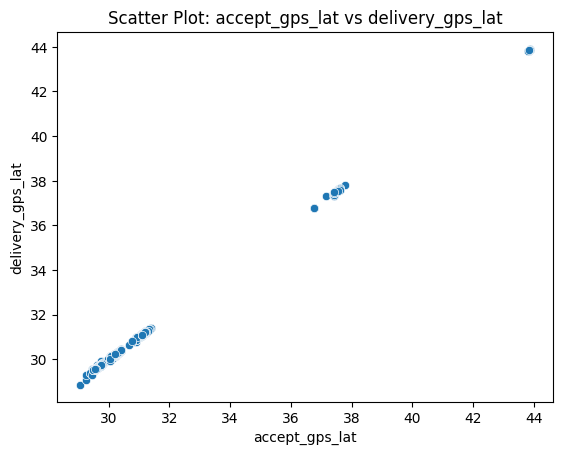

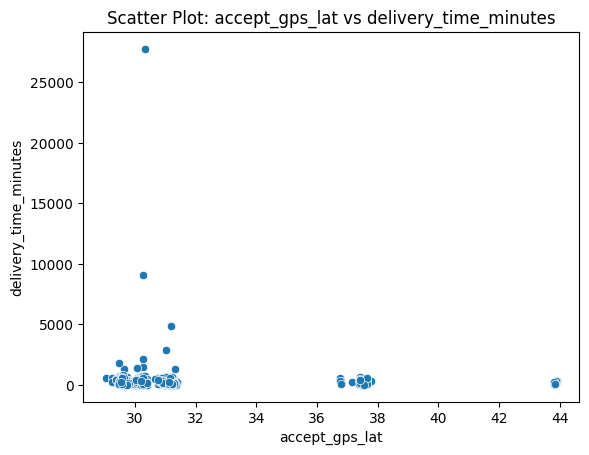

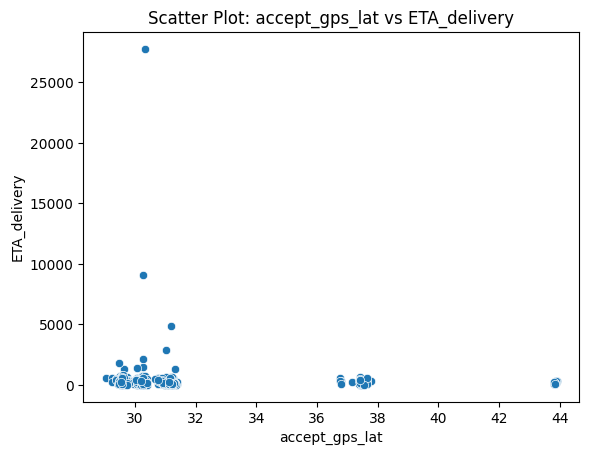

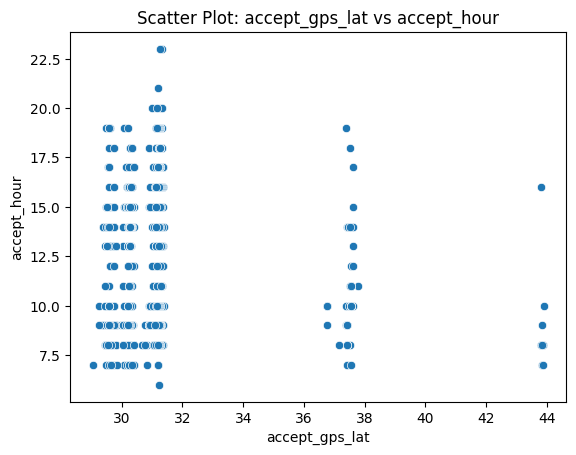

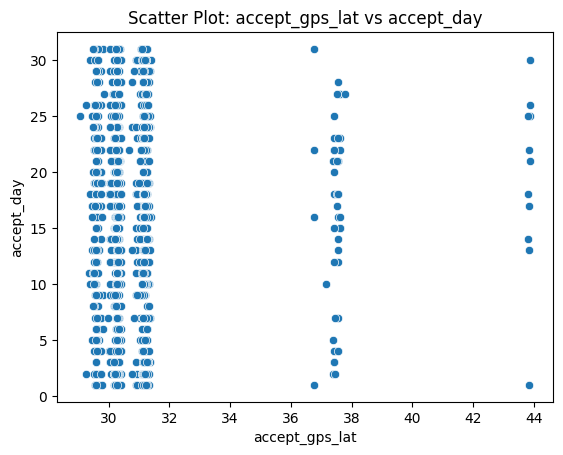

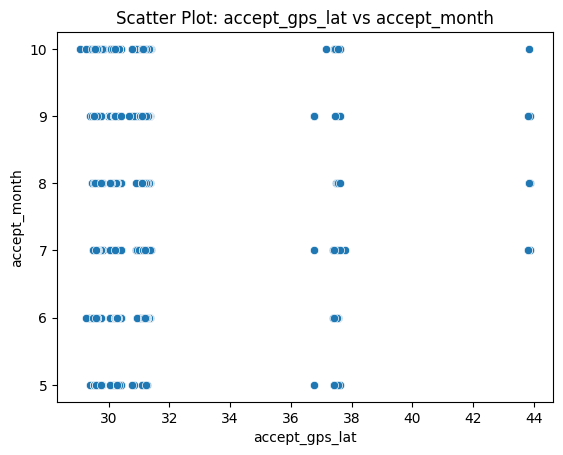

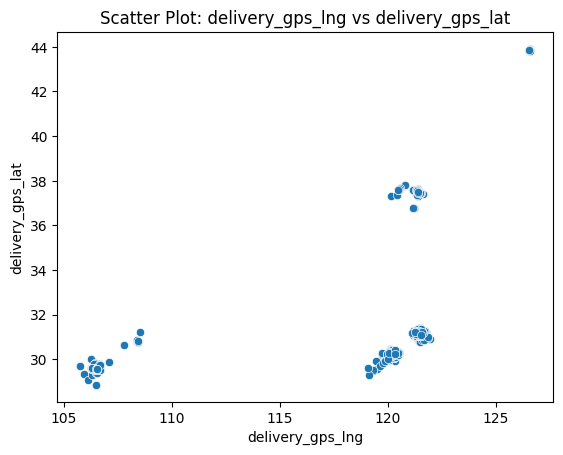

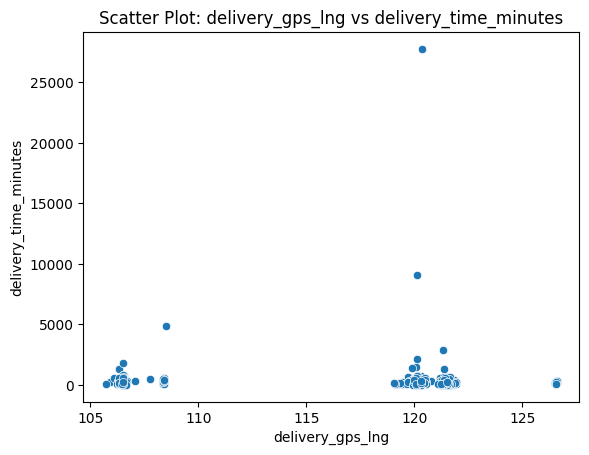

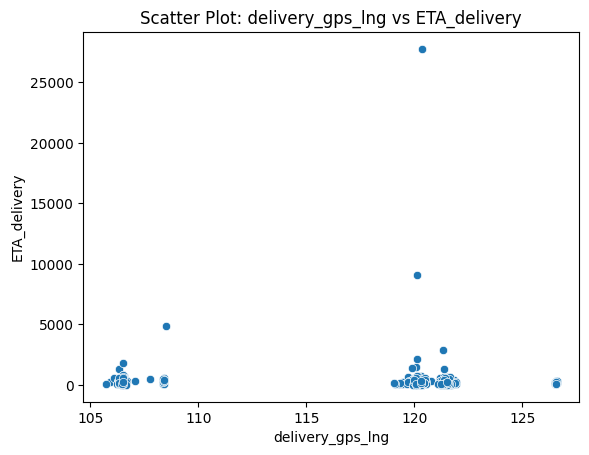

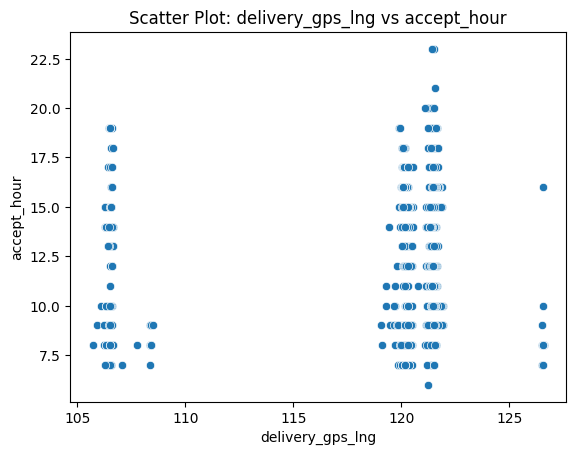

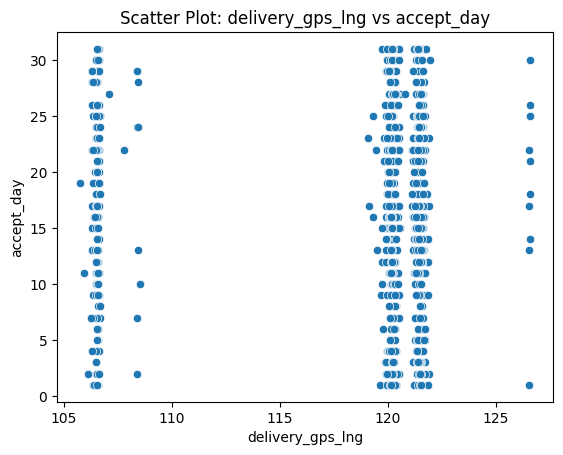

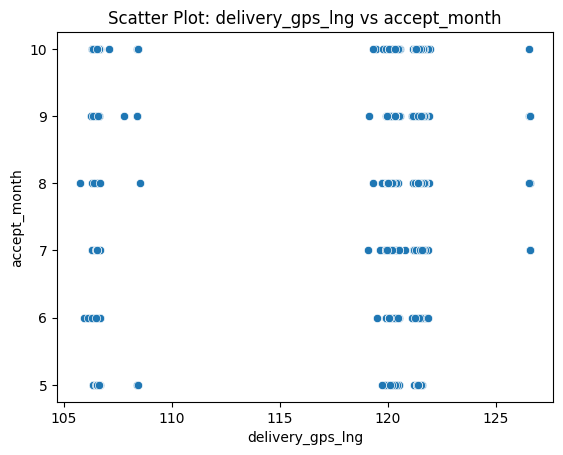

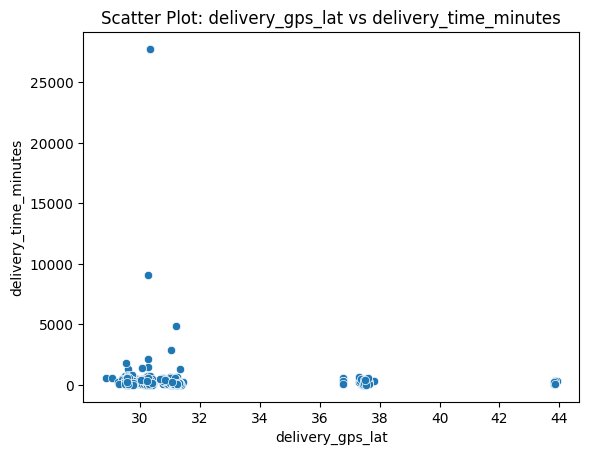

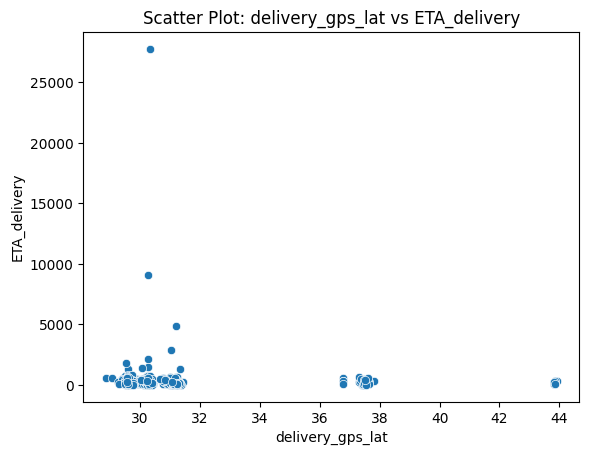

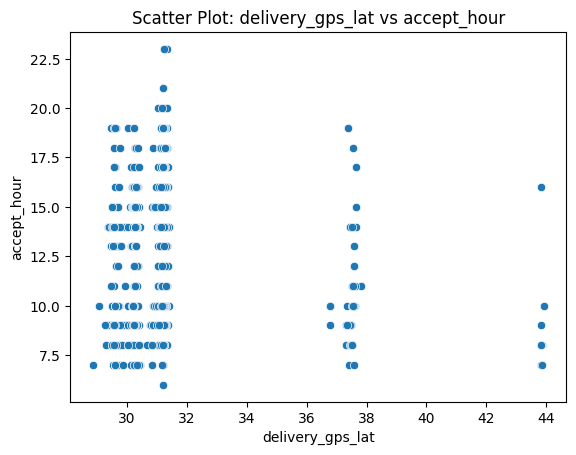

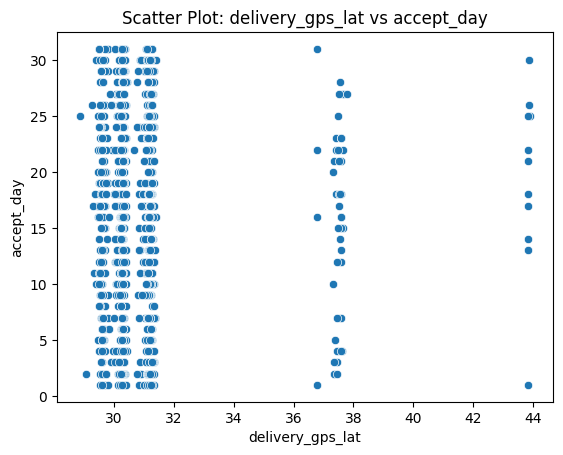

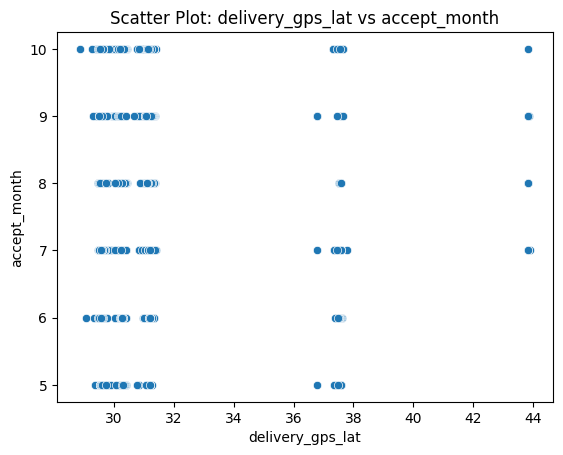

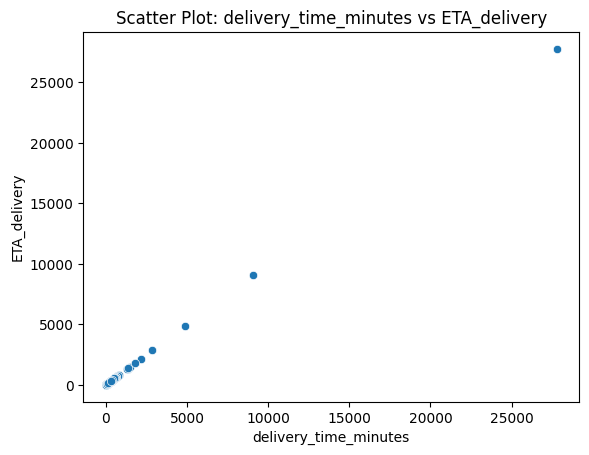

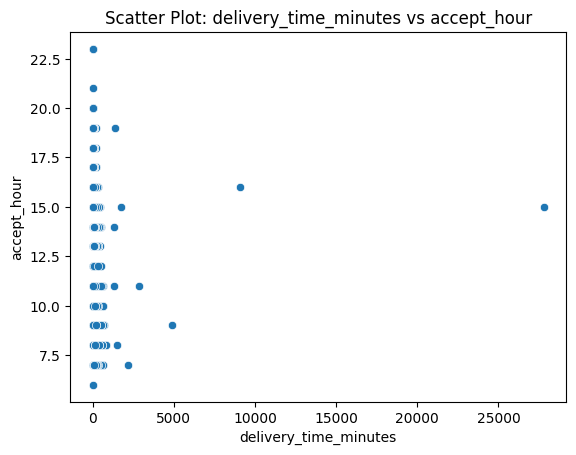

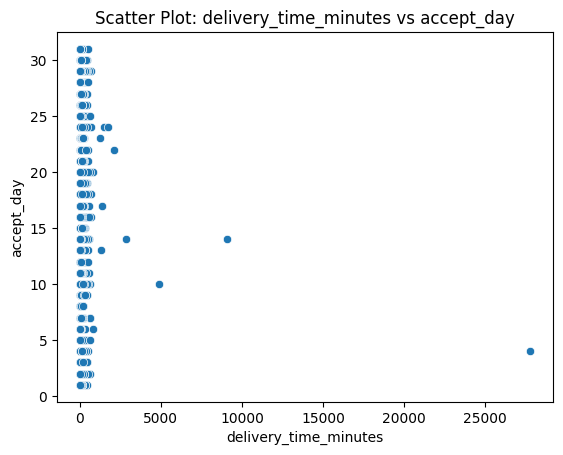

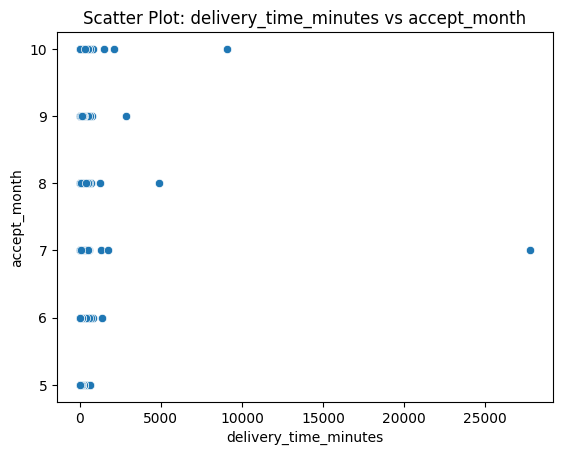

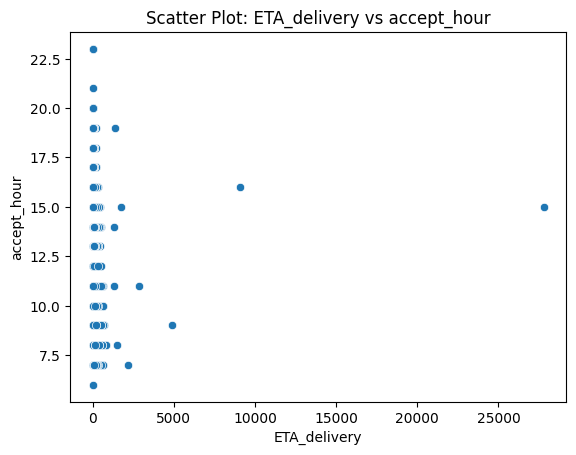

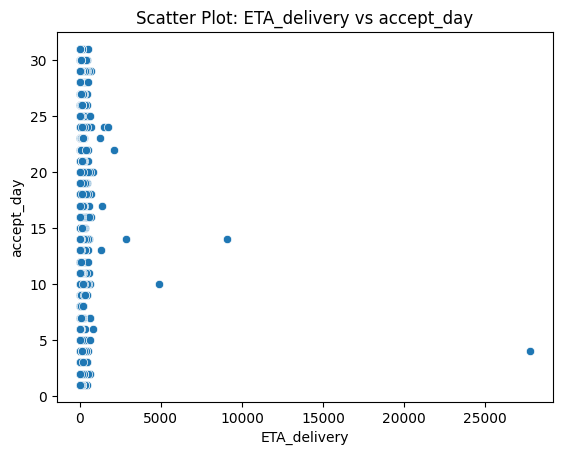

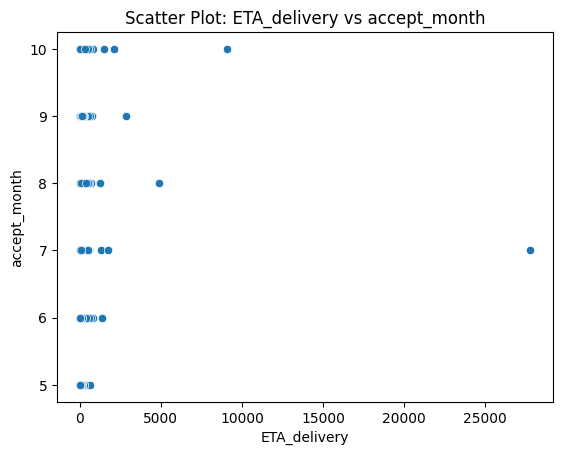

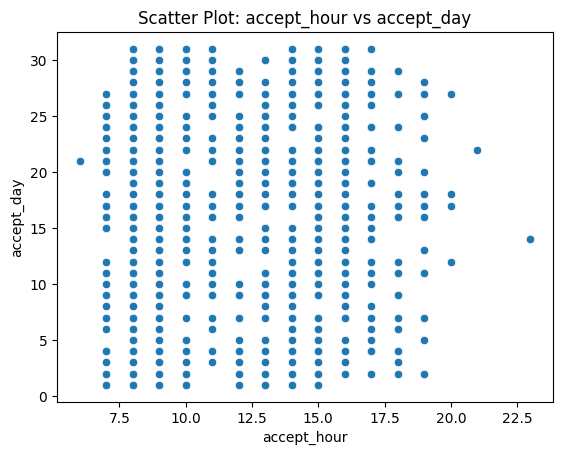

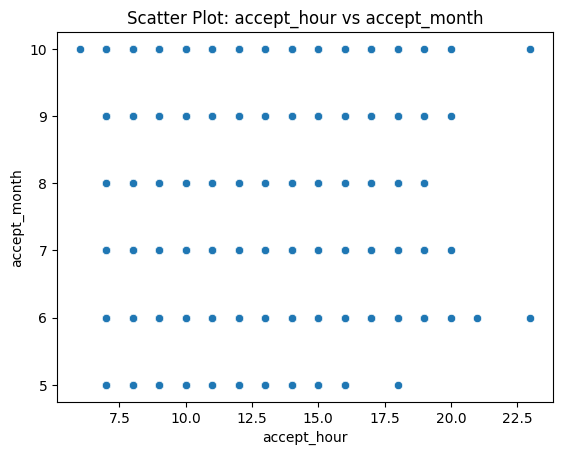

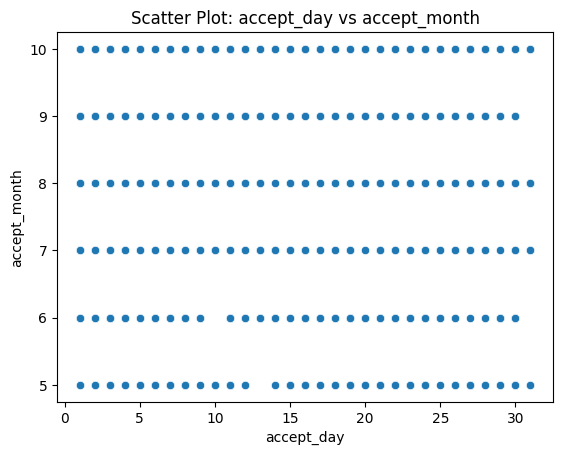

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner les colonnes
selected_columns = ['lng', 'lat', 'accept_gps_lng', 'accept_gps_lat',
                    'delivery_gps_lng', 'delivery_gps_lat', 'delivery_time_minutes',
                    'ETA_delivery', 'accept_hour', 'accept_day', 'accept_month']

# Prendre un échantillon de 1000 lignes
sampled_data = delivery_df.sample(n=1000, random_state=42)

# Parcourir les colonnes avec une boucle for et tracer uniquement les combinaisons uniques
for i in range(len(selected_columns)):
    for j in range(i + 1, len(selected_columns)):
        # Tracer un scatter plot pour chaque paire de colonnes distinctes
        sns.scatterplot(x=sampled_data[selected_columns[i]], y=sampled_data[selected_columns[j]])
        plt.title(f'Scatter Plot: {selected_columns[i]} vs {selected_columns[j]}')
        plt.show()


pickup

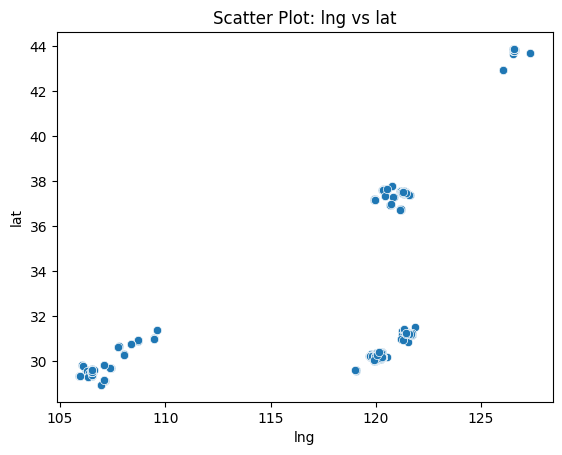

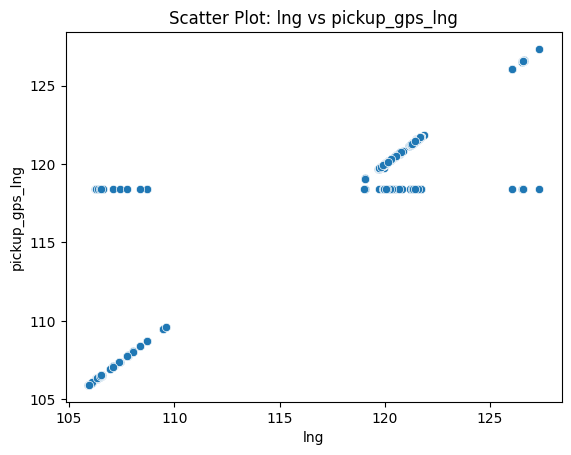

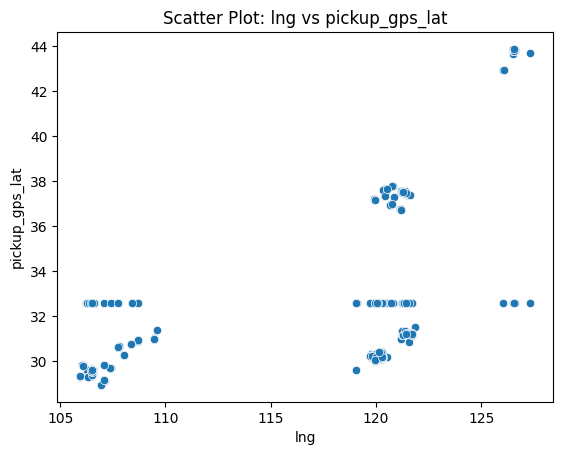

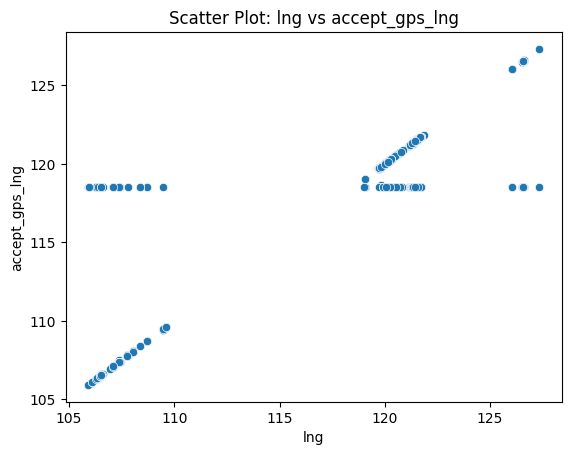

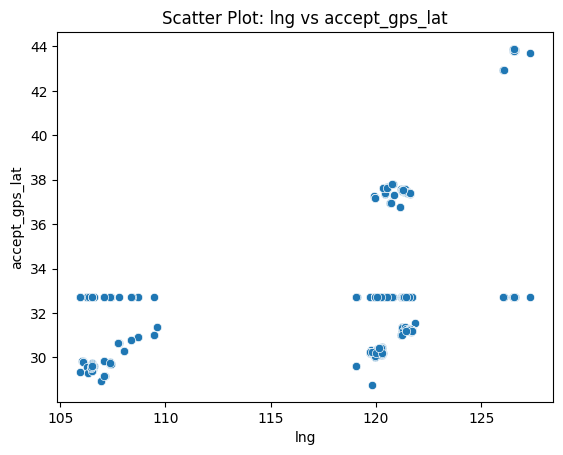

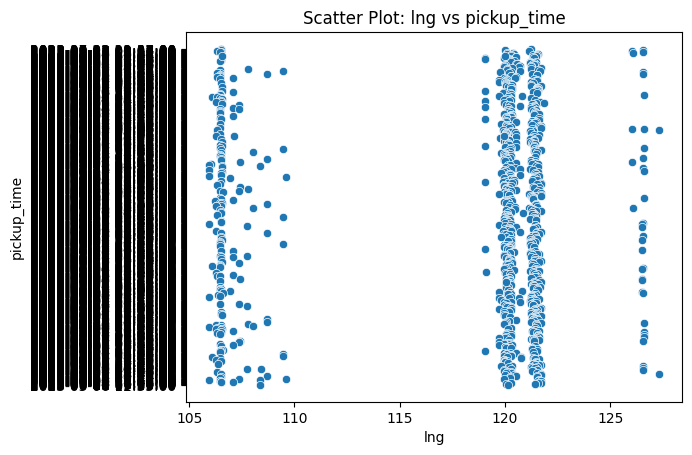

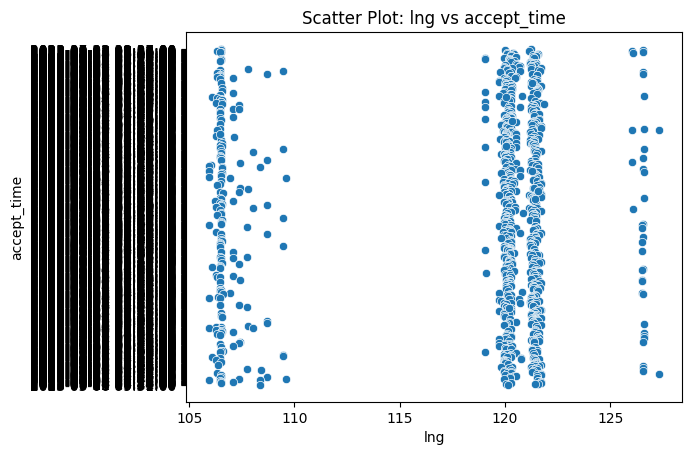

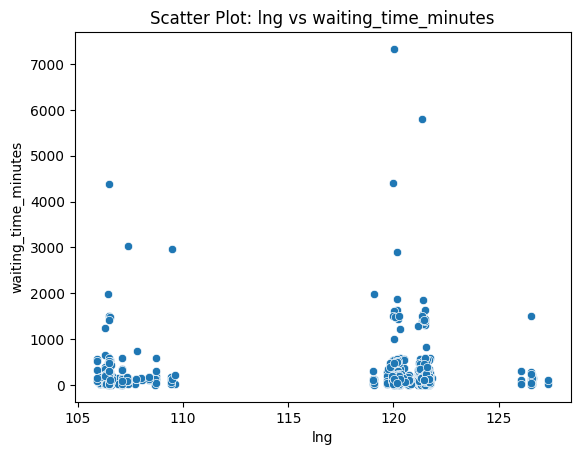

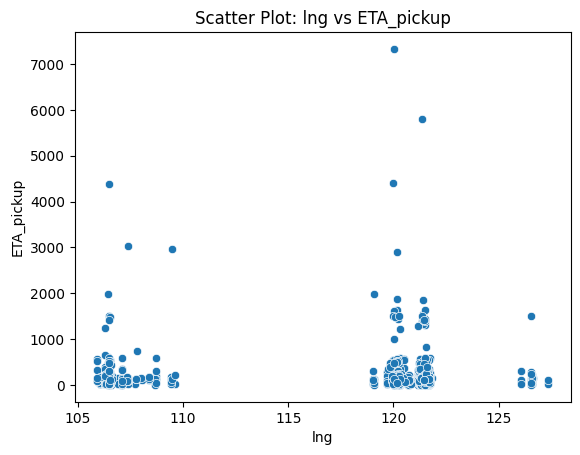

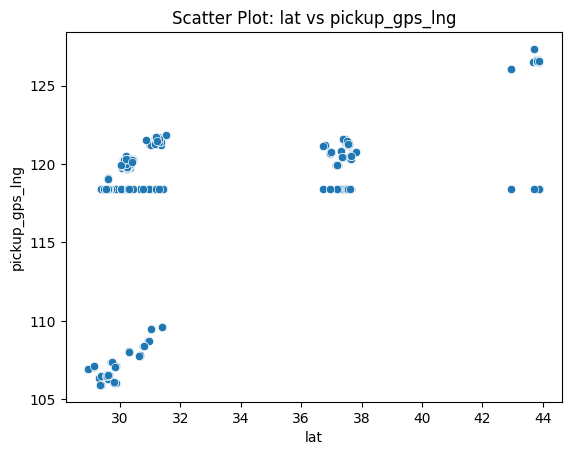

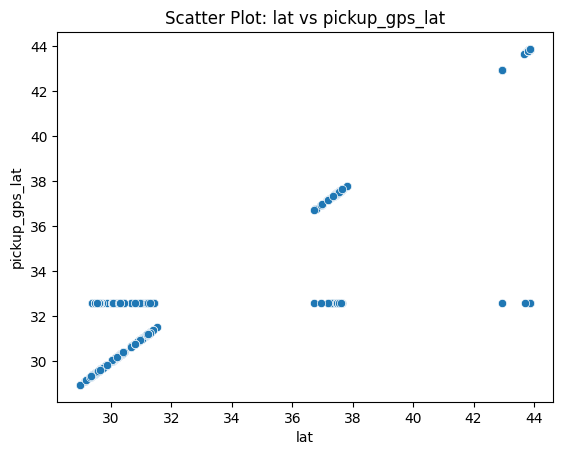

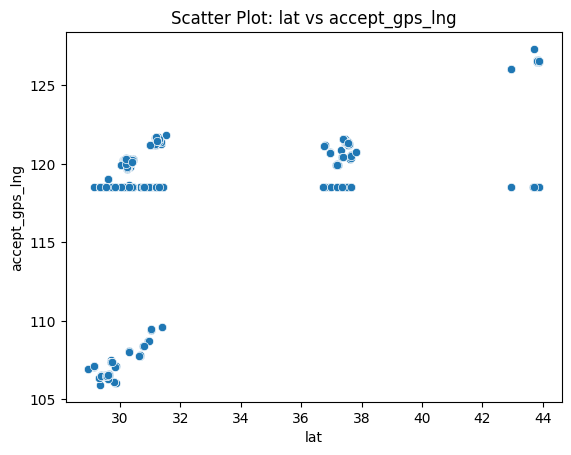

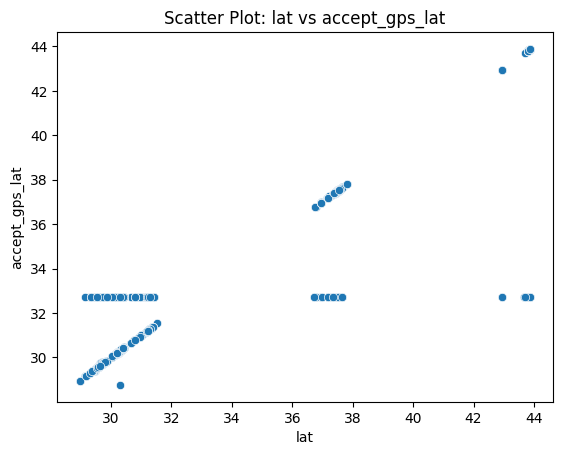

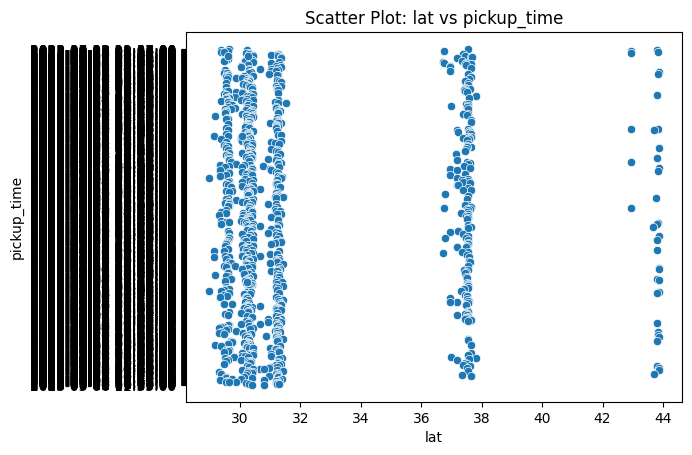

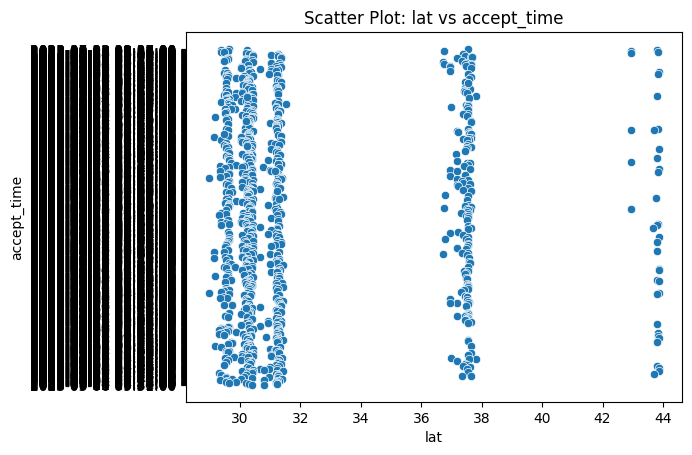

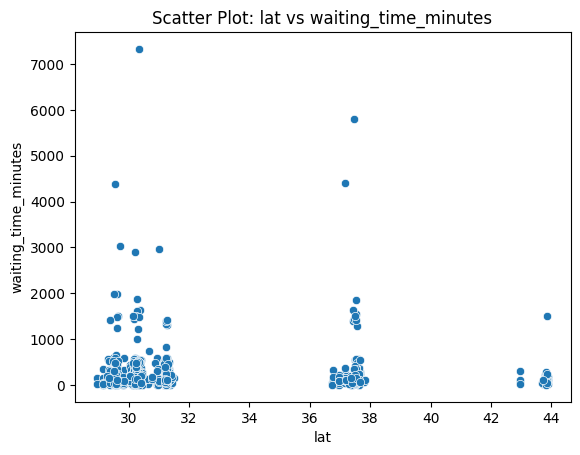

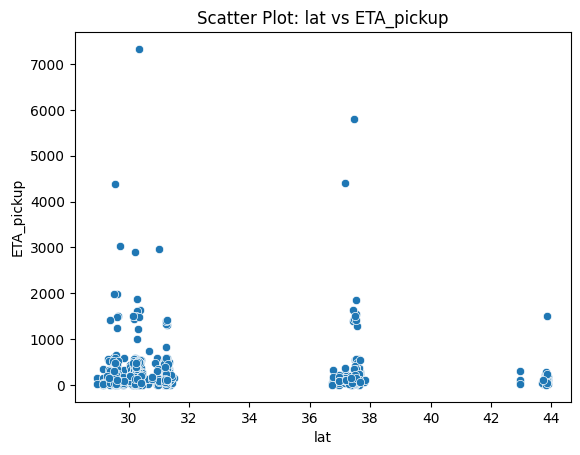

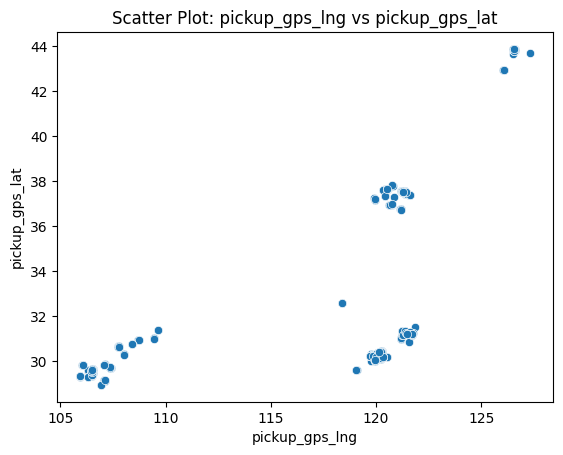

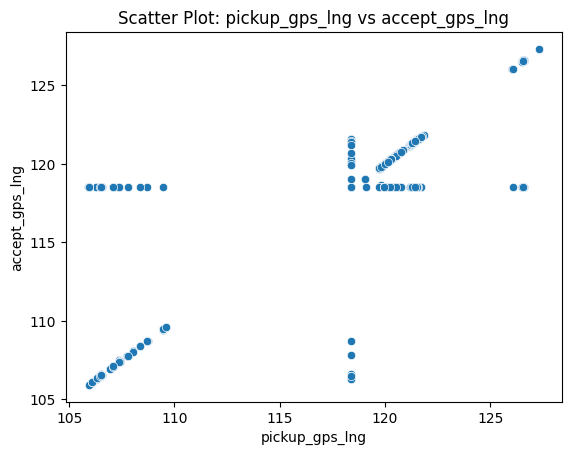

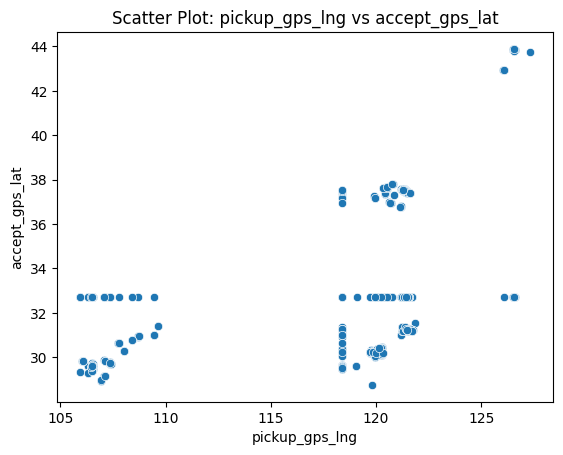

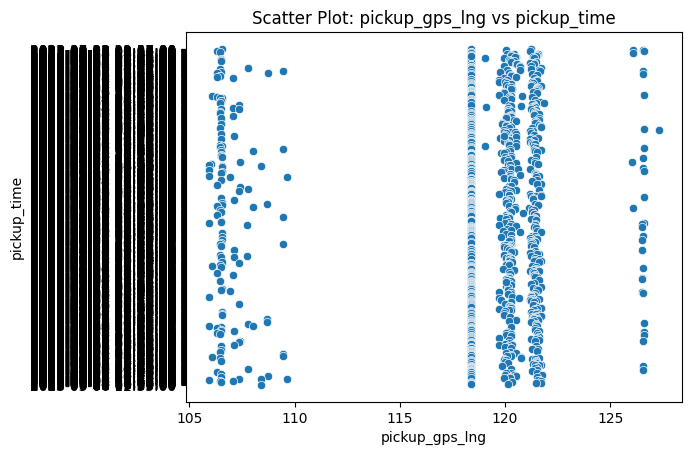

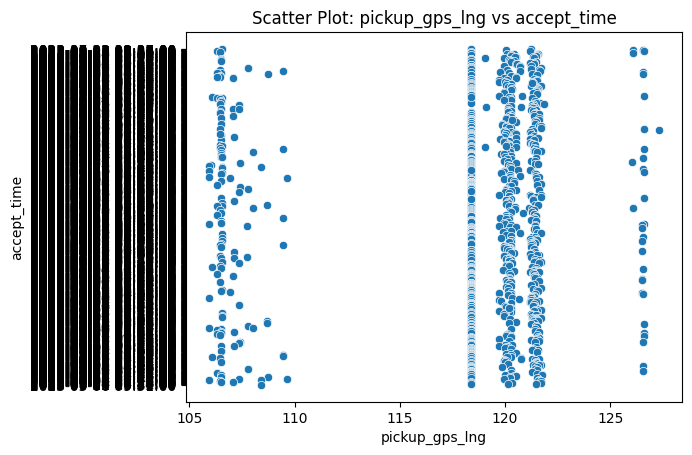

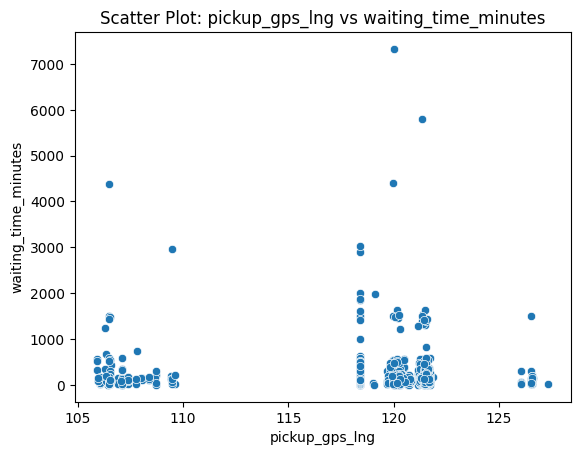

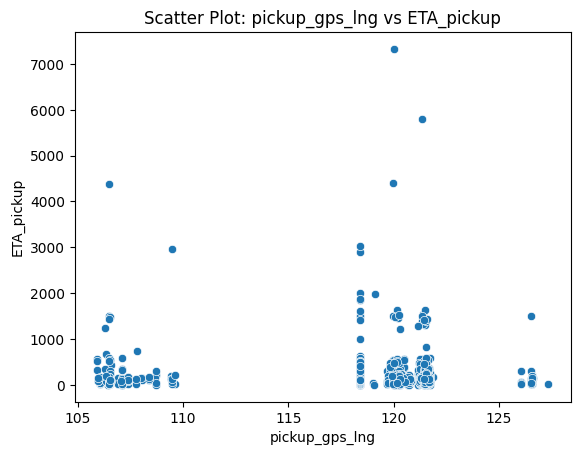

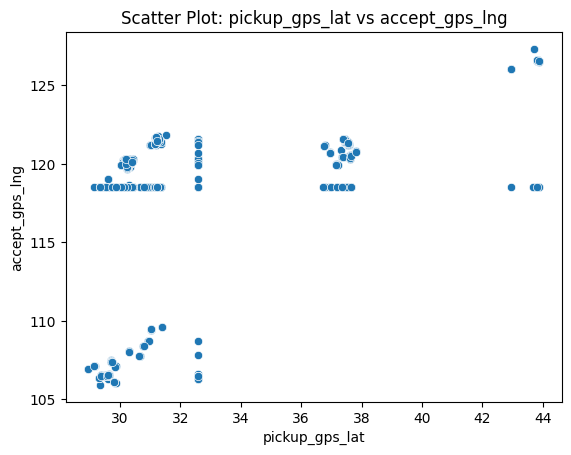

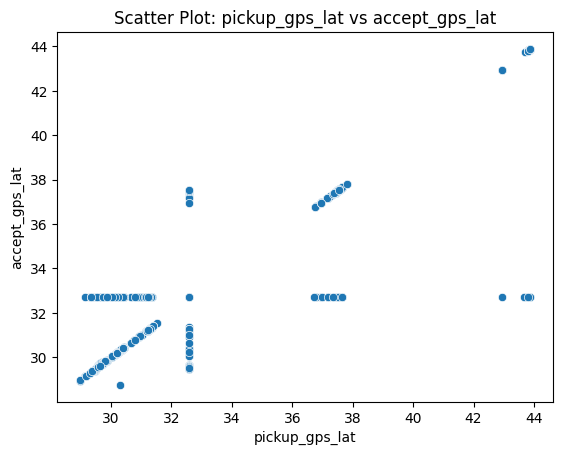

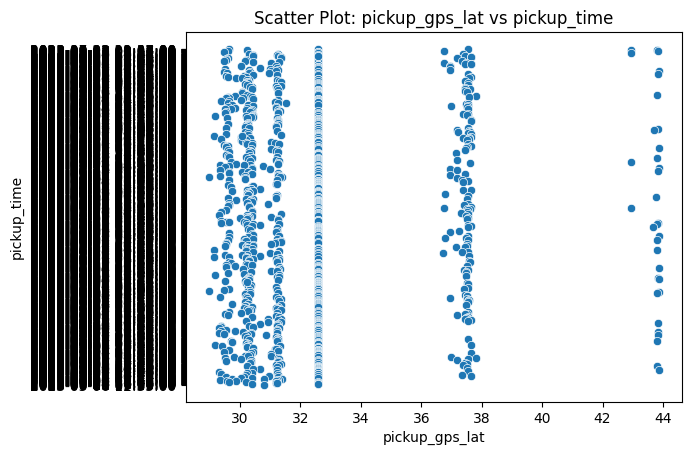

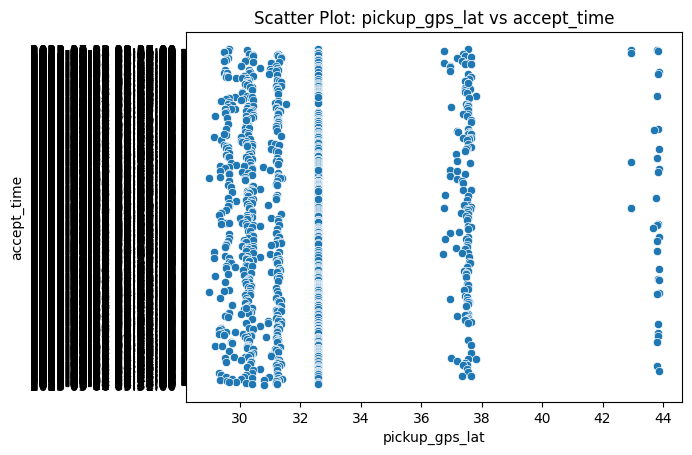

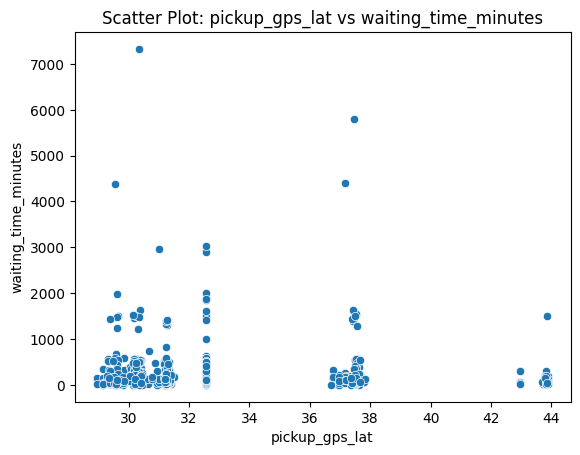

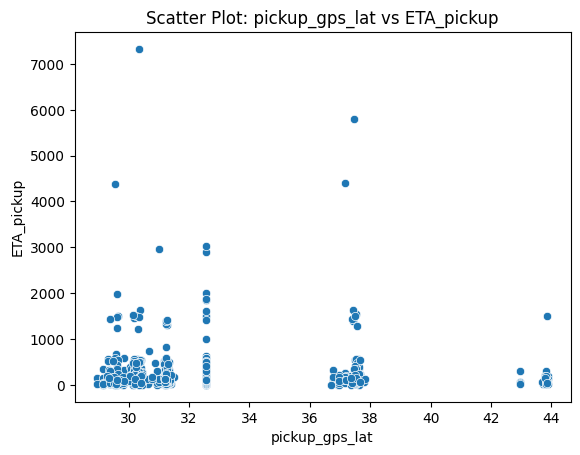

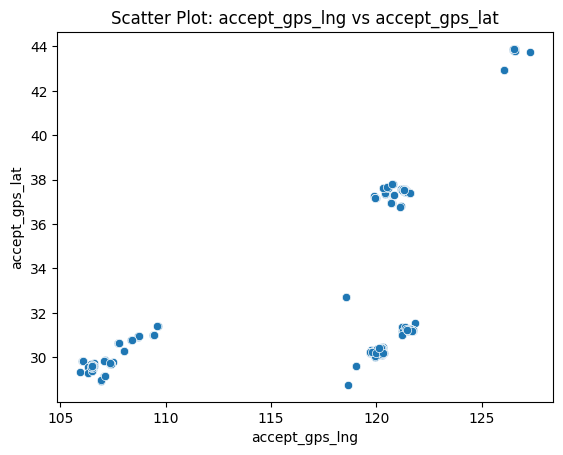

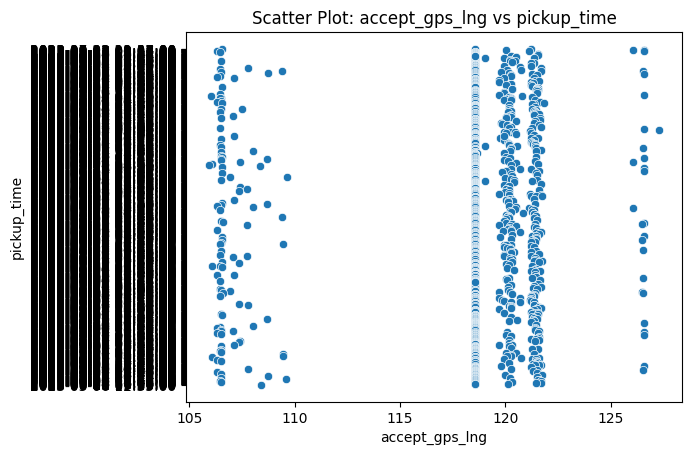

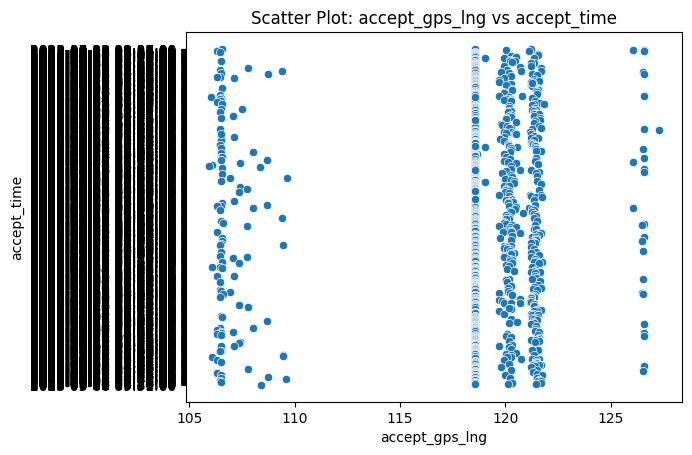

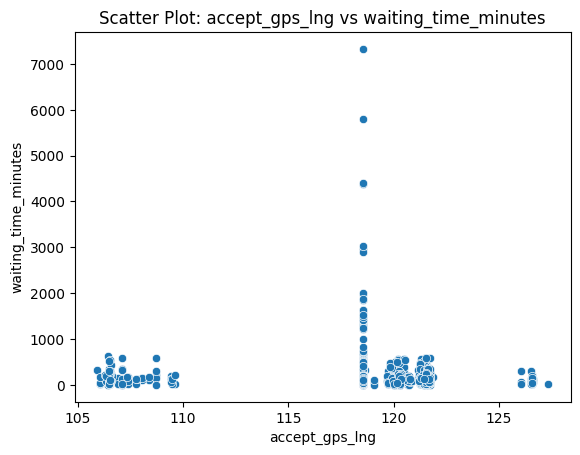

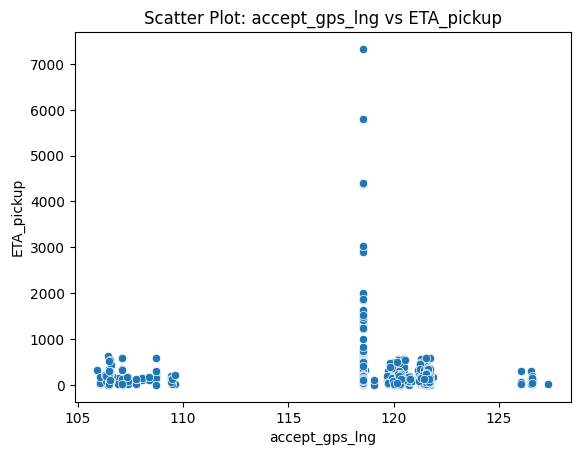

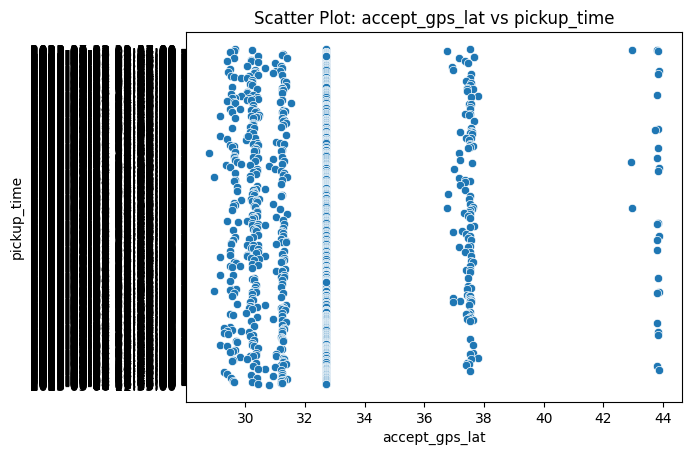

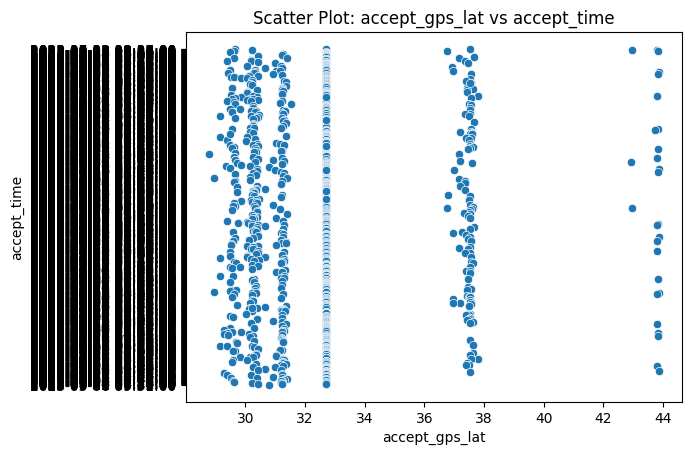

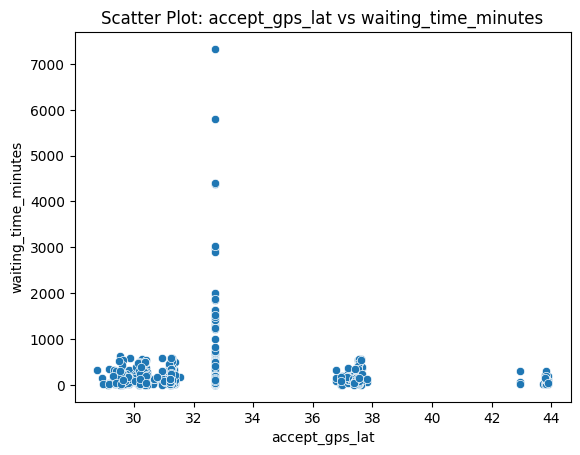

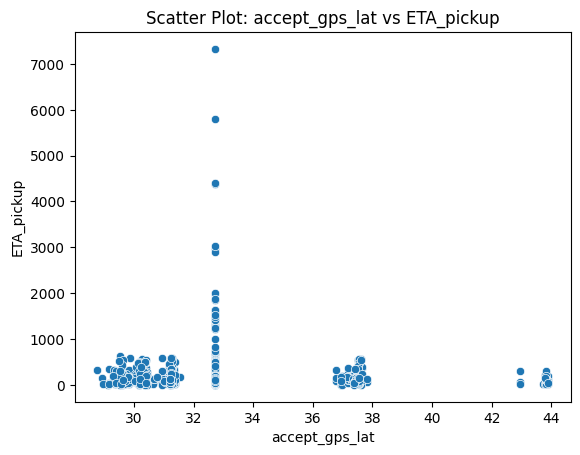

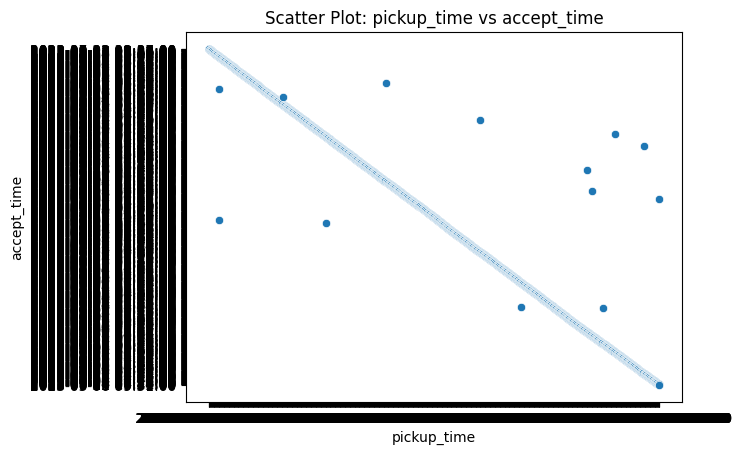

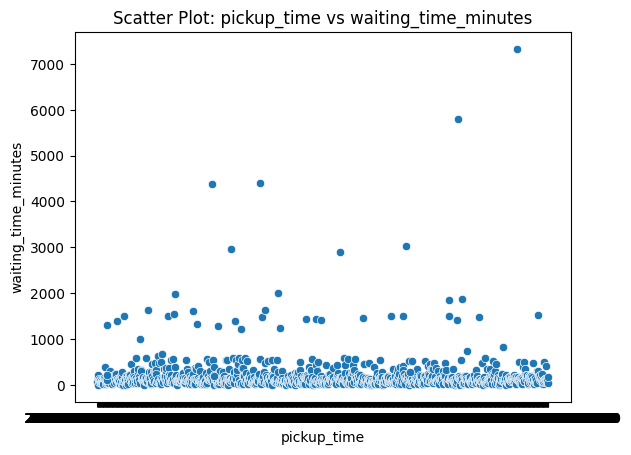

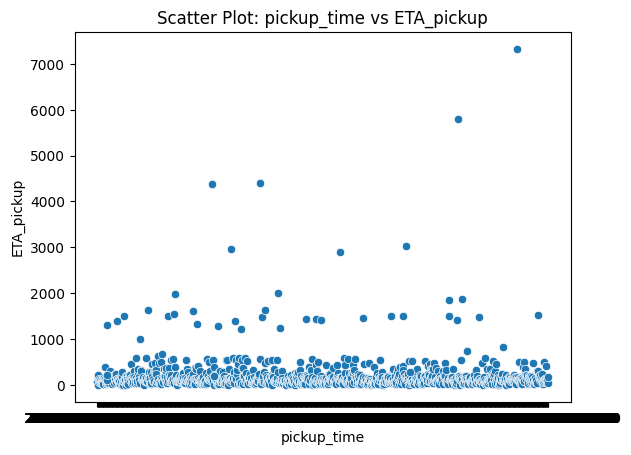

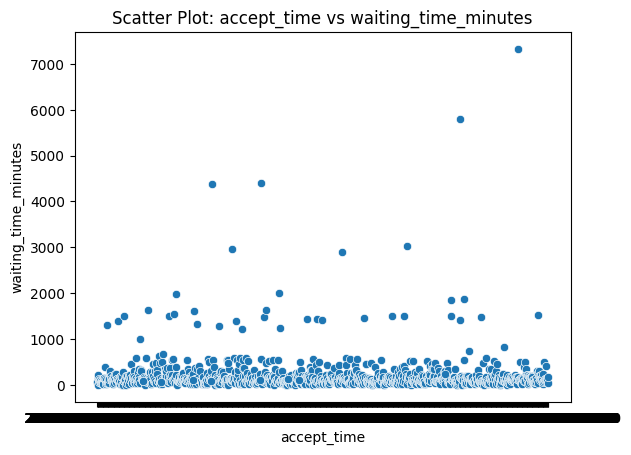

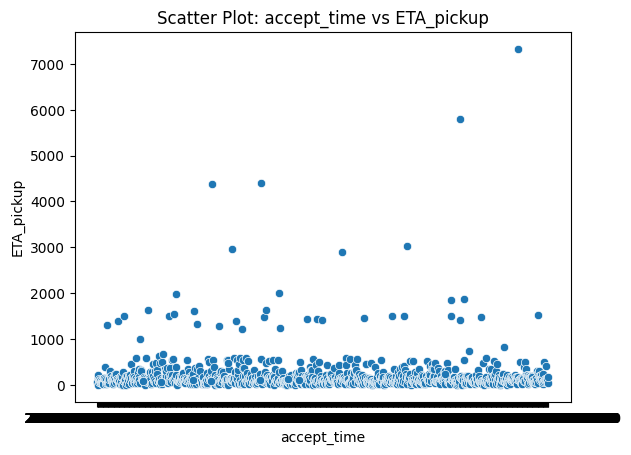

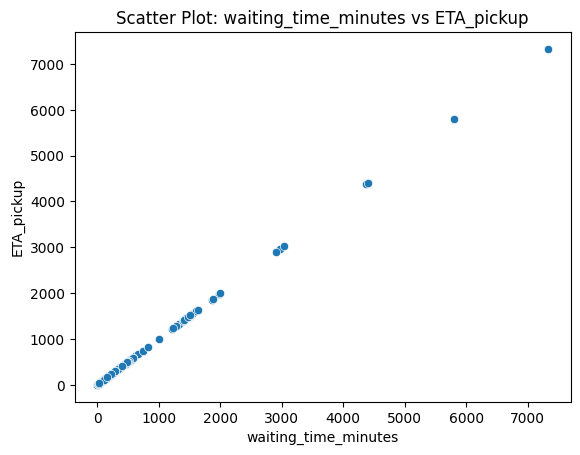

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner les colonnes pertinentes pour l'analyse
selected_columns = ['lng', 'lat', 'pickup_gps_lng', 'pickup_gps_lat',
                    'accept_gps_lng', 'accept_gps_lat', 'pickup_time',
                    'accept_time', 'waiting_time_minutes', 'ETA_pickup']




# Prendre un échantillon de 1000 lignes
sampled_data = pickup_df.sample(n=1000, random_state=42)

# Parcourir les colonnes avec une boucle for et tracer uniquement les combinaisons uniques
for i in range(len(selected_columns)):
    for j in range(i + 1, len(selected_columns)):
        # Tracer un scatter plot pour chaque paire de colonnes distinctes
        sns.scatterplot(x=sampled_data[selected_columns[i]], y=sampled_data[selected_columns[j]])
        plt.title(f'Scatter Plot: {selected_columns[i]} vs {selected_columns[j]}')
        plt.show()



correlation matrix- delivery

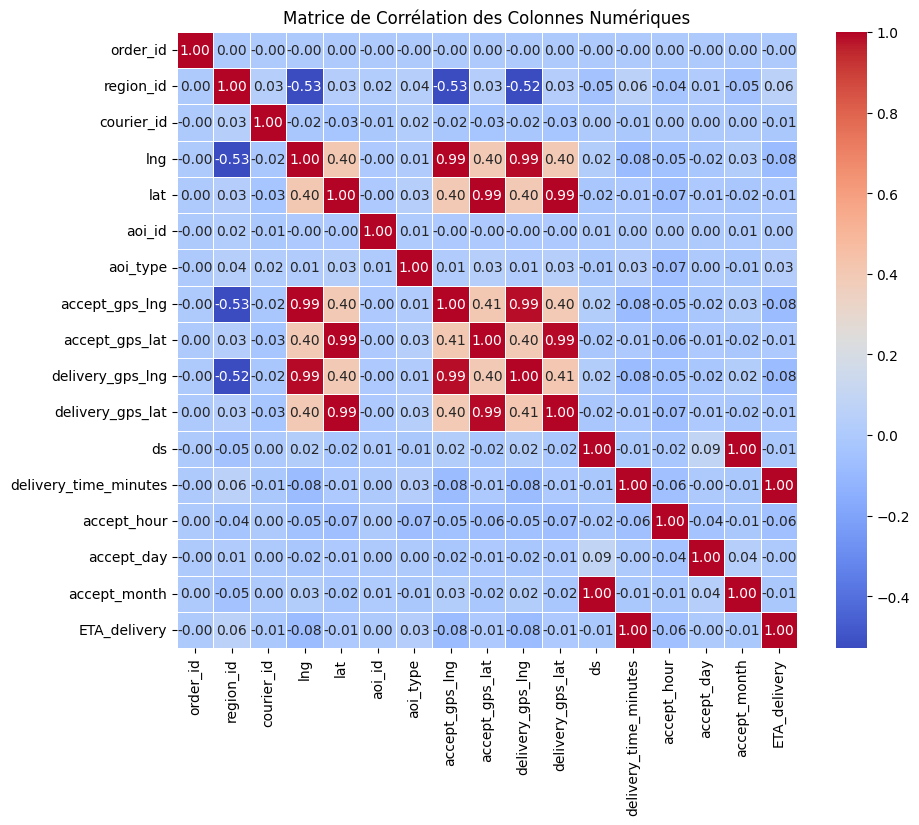

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner uniquement les colonnes numériques
numeric_columns = delivery_df.select_dtypes(include=['float64', 'int64']).columns

# Calculer la matrice de corrélation
correlation_matrix = delivery_df[numeric_columns].corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))  # Ajustez la taille de la figure si nécessaire
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation des Colonnes Numériques')
plt.show()


correlation matrix-pickup

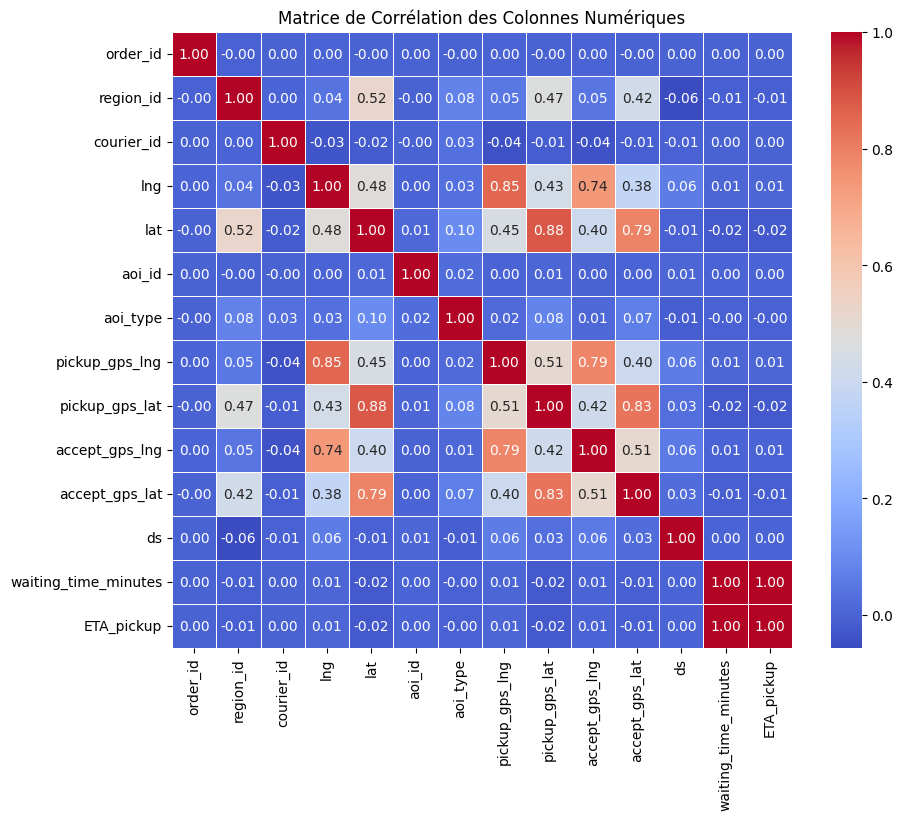

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner uniquement les colonnes numériques
numeric_columns = pickup_df.select_dtypes(include=['float64', 'int64']).columns

# Calculer la matrice de corrélation
correlation_matrix = pickup_df[numeric_columns].corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))  # Ajustez la taille de la figure si nécessaire
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation des Colonnes Numériques')
plt.show()


#Multivariate Data Analysis:

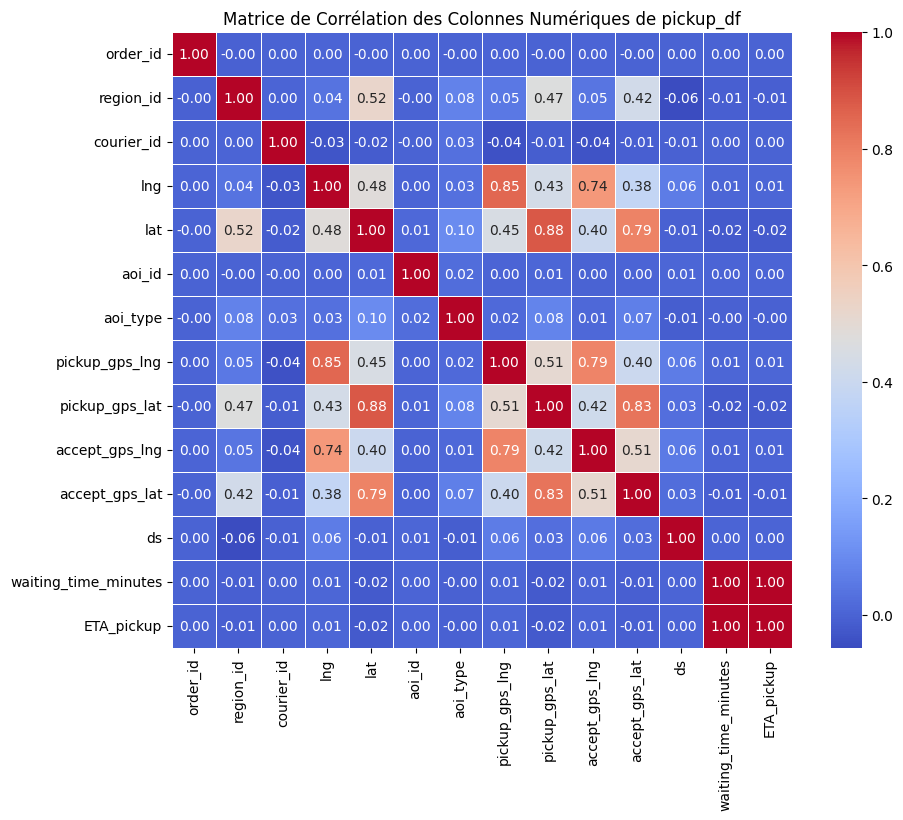

In [14]:
#Use a heatmap to visualize the correlation structure among all numerical features
numeric_columns = pickup_df.select_dtypes(include=['float64', 'int64']).columns

# Calculer et afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))  # Ajuster la taille de la figure
sns.heatmap(pickup_df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation des Colonnes Numériques de pickup_df')
plt.show()



In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(delivery_df.select_dtypes(include=[np.number]))
pca_components = pca.fit_transform(standardized_data)


Dimensionality Reduction with PCA:

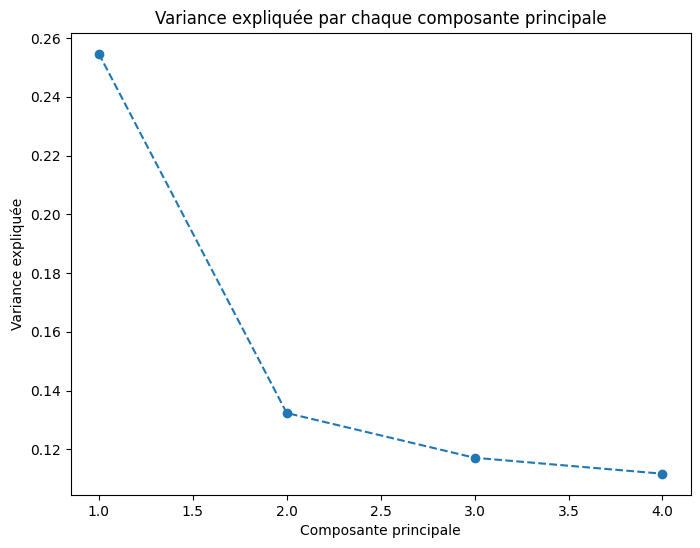

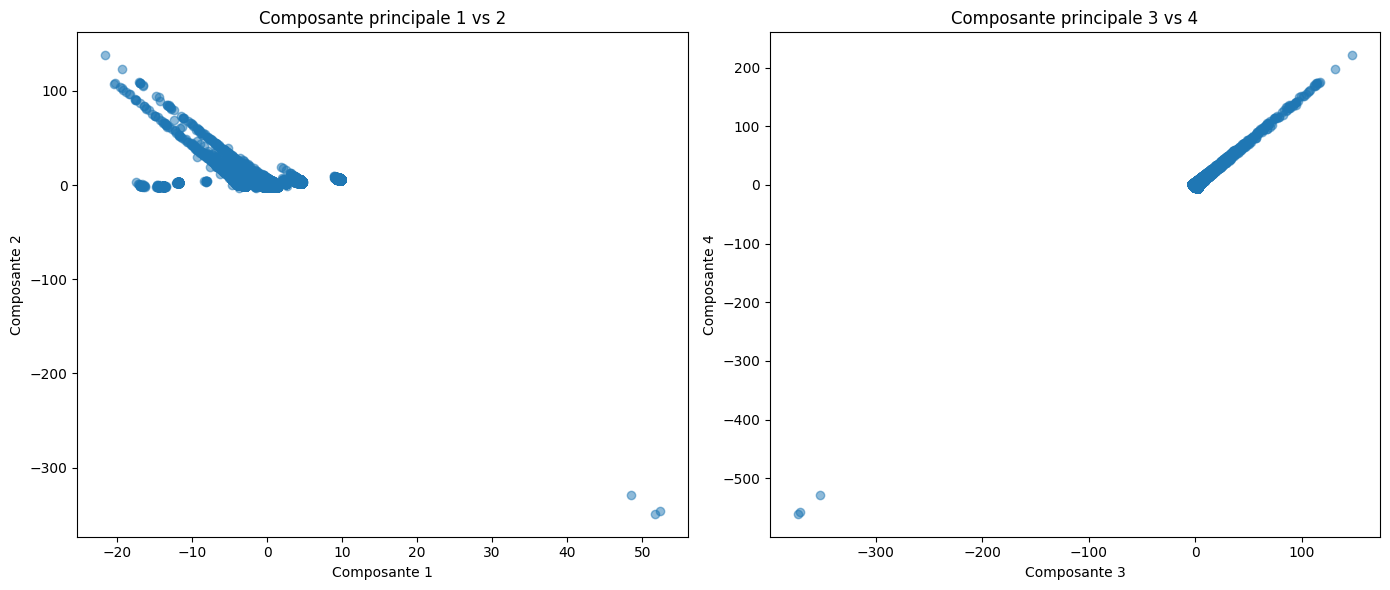

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
normalized_data = scaler.fit_transform(delivery_df.select_dtypes(include=[np.number]))

# Appliquer PCA avec 4 composantes principales
pca = PCA(n_components=4)
pca_components = pca.fit_transform(normalized_data)

# Tracer la variance expliquée par chaque composante
plt.figure(figsize=(8, 6))
plt.plot(range(1, 5), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title("Variance expliquée par chaque composante principale")
plt.xlabel("Composante principale")
plt.ylabel("Variance expliquée")
plt.show()

# Tracer les 4 premières composantes dans un graphique 2D (composantes 1 et 2, puis 3 et 4)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Composantes 1 vs 2
axes[0].scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.5)
axes[0].set_title("Composante principale 1 vs 2")
axes[0].set_xlabel("Composante 1")
axes[0].set_ylabel("Composante 2")

# Composantes 3 vs 4
axes[1].scatter(pca_components[:, 2], pca_components[:, 3], alpha=0.5)
axes[1].set_title("Composante principale 3 vs 4")
axes[1].set_xlabel("Composante 3")
axes[1].set_ylabel("Composante 4")

plt.tight_layout()
plt.show()



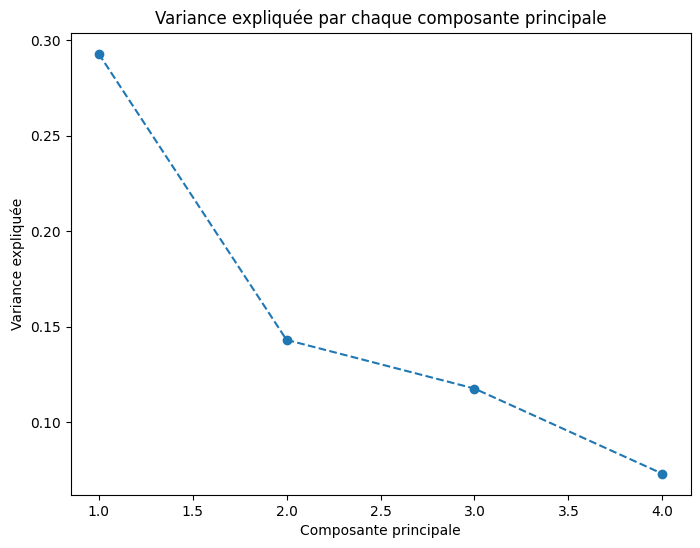

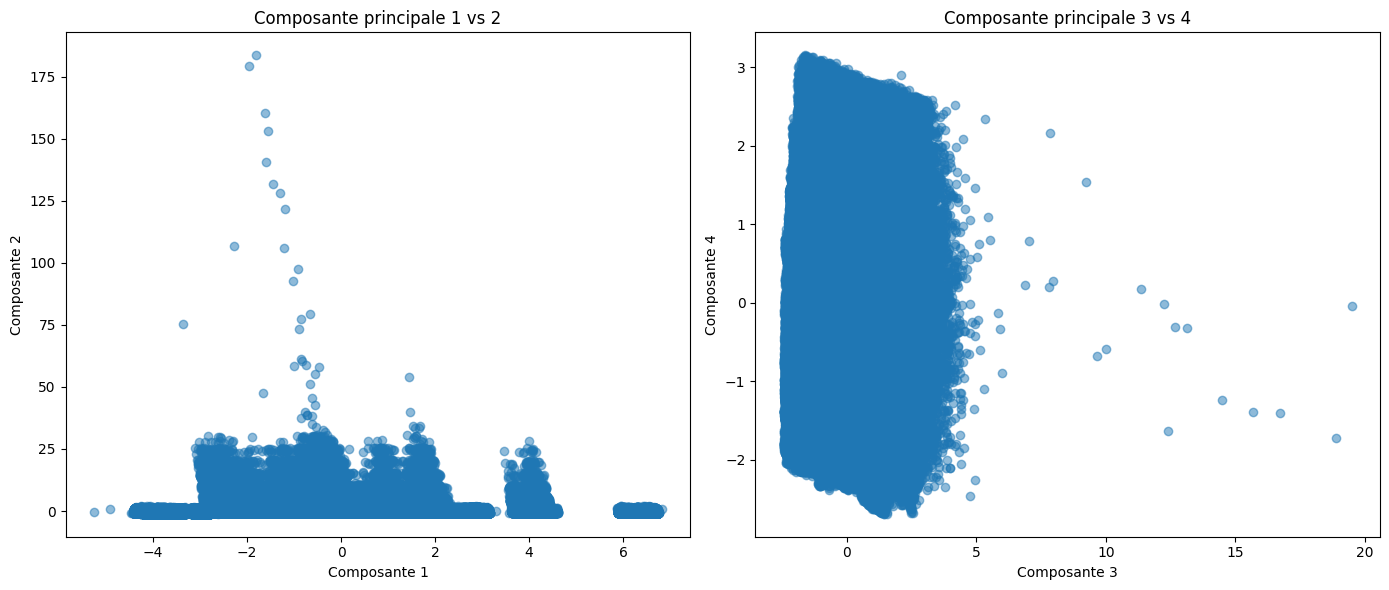

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
normalized_data = scaler.fit_transform(pickup_df.select_dtypes(include=[np.number]))

# Appliquer PCA avec 4 composantes principales
pca = PCA(n_components=4)
pca_components = pca.fit_transform(normalized_data)

# Tracer la variance expliquée par chaque composante
plt.figure(figsize=(8, 6))
plt.plot(range(1, 5), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title("Variance expliquée par chaque composante principale")
plt.xlabel("Composante principale")
plt.ylabel("Variance expliquée")
plt.show()

# Tracer les 4 premières composantes dans un graphique 2D (composantes 1 et 2, puis 3 et 4)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Composantes 1 vs 2
axes[0].scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.5)
axes[0].set_title("Composante principale 1 vs 2")
axes[0].set_xlabel("Composante 1")
axes[0].set_ylabel("Composante 2")

# Composantes 3 vs 4
axes[1].scatter(pca_components[:, 2], pca_components[:, 3], alpha=0.5)
axes[1].set_title("Composante principale 3 vs 4")
axes[1].set_xlabel("Composante 3")
axes[1].set_ylabel("Composante 4")

plt.tight_layout()
plt.show()



#Conclusion and Insights: